In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns

from hu_nmt.data_augmentator.translate.translate import get_translator
from hu_nmt.data_augmentator.utils.cosine_similarity import get_model, get_word_average_cos_similarity, get_sentence_embedding_cos_similarity

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

In [2]:
batch_size = 512

In [3]:
huen_translator = get_translator(
    model_path='/home1/hu-nmt/patrick/opennmt/experiments/runs/huen-poc/run/model.pt',
    sp_model_path='/home1/hu-nmt/data/Hunglish2/combined-32-simple/sp_models/spm_huen.model',
    batch_size=batch_size)
enhu_translator = get_translator(
    model_path='/home1/hu-nmt/patrick/opennmt/experiments/runs/enhu-poc/run/model.pt',
    sp_model_path='/home1/hu-nmt/data/Hunglish2/combined-32-simple/sp_models/spm_huen.model',
    batch_size=batch_size)

[2021-11-12 18:30:30,810 INFO] Using model: ['/home1/hu-nmt/patrick/opennmt/experiments/runs/huen-poc/run/model.pt']
[2021-11-12 18:30:30,815 INFO] Using sentencepiece model: /home1/hu-nmt/data/Hunglish2/combined-32-simple/sp_models/spm_huen.model
[2021-11-12 18:30:36,891 INFO] Using model: ['/home1/hu-nmt/patrick/opennmt/experiments/runs/enhu-poc/run/model.pt']
[2021-11-12 18:30:36,893 INFO] Using sentencepiece model: /home1/hu-nmt/data/Hunglish2/combined-32-simple/sp_models/spm_huen.model


In [4]:
data_path = '/home1/hu-nmt/data/Hunglish2/augmented/generated-0.25/obj_swapping'

In [5]:
import os

eng_path = os.path.join(data_path, 'obj_swapping.en')
hun_path = os.path.join(data_path, 'obj_swapping.hu')

In [6]:
en_embedding_model = get_model('en')
hu_embedding_model = get_model('hu')

In [9]:
huen_similarity_scores, enhu_similarity_scores = [], []
hun_lines, eng_lines = [], []
translated_hun_lines, translated_eng_lines = [], []
with open(hun_path, 'r') as hun_file:
    with open(eng_path, 'r') as eng_file:
        for i, (hun_line, eng_line) in tqdm(enumerate(zip(hun_file, eng_file))):
            hun_lines.append(hun_line.strip())
            eng_lines.append(eng_line.strip())
            
            if len(hun_lines) % batch_size == 0:
                # translate lines
                translated_eng_lines.extend(huen_translator.translate(hun_lines[-batch_size:]))
                translated_hun_lines.extend(enhu_translator.translate(eng_lines[-batch_size:]))
            
                # check similarity
                huen_scores = [get_sentence_embedding_cos_similarity(eng_line, translated_eng_line, en_embedding_model) for eng_line, translated_eng_line in zip(eng_lines[-batch_size:], translated_eng_lines[-batch_size:])]
                enhu_scores = [get_sentence_embedding_cos_similarity(hun_line, translated_hun_line, hu_embedding_model) for hun_line, translated_hun_line in zip(hun_lines[-batch_size:], translated_hun_lines[-batch_size:])]
            
                # save result
                huen_similarity_scores.extend([score[0][0] for score in huen_scores])
                enhu_similarity_scores.extend([score[0][0] for score in enhu_scores])
                
        last_batch_size = len(hun_lines) - (int(len(hun_lines) / batch_size) * batch_size)
        
        # translate lines
        translated_eng_lines.extend(huen_translator.translate(hun_lines[-last_batch_size:]))
        translated_hun_lines.extend(enhu_translator.translate(eng_lines[-last_batch_size:]))

        # check similarity
        huen_scores = [get_sentence_embedding_cos_similarity(eng_line, translated_eng_line, en_embedding_model) for eng_line, translated_eng_line in zip(eng_lines[-last_batch_size:], translated_eng_lines[-last_batch_size:])]
        enhu_scores = [get_sentence_embedding_cos_similarity(hun_line, translated_hun_line, hu_embedding_model) for hun_line, translated_hun_line in zip(hun_lines[-last_batch_size:], translated_hun_lines[-last_batch_size:])]

        # save result
        huen_similarity_scores.extend([score[0][0] for score in huen_scores])
        enhu_similarity_scores.extend([score[0][0] for score in enhu_scores])

0it [00:00, ?it/s]

[2021-11-12 21:07:25,922 INFO] Translating shard 0.
[2021-11-12 21:07:27,967 INFO] PRED AVG SCORE: -0.5174, PRED PPL: 1.6776
[2021-11-12 21:07:27,988 INFO] Translating shard 0.
[2021-11-12 21:07:29,866 INFO] PRED AVG SCORE: -0.7053, PRED PPL: 2.0244
[2021-11-12 21:07:30,290 INFO] Translating shard 0.
[2021-11-12 21:07:32,201 INFO] PRED AVG SCORE: -0.5342, PRED PPL: 1.7061
[2021-11-12 21:07:32,213 INFO] Translating shard 0.
[2021-11-12 21:07:34,178 INFO] PRED AVG SCORE: -0.7214, PRED PPL: 2.0573
[2021-11-12 21:07:34,554 INFO] Translating shard 0.
[2021-11-12 21:07:36,537 INFO] PRED AVG SCORE: -0.5136, PRED PPL: 1.6713
[2021-11-12 21:07:36,548 INFO] Translating shard 0.
[2021-11-12 21:07:38,648 INFO] PRED AVG SCORE: -0.7323, PRED PPL: 2.0798
[2021-11-12 21:07:39,005 INFO] Translating shard 0.
[2021-11-12 21:07:40,821 INFO] PRED AVG SCORE: -0.5093, PRED PPL: 1.6642
[2021-11-12 21:07:40,835 INFO] Translating shard 0.
[2021-11-12 21:07:42,929 INFO] PRED AVG SCORE: -0.7201, PRED PPL: 2.0547


[2021-11-12 21:09:54,673 INFO] Translating shard 0.
[2021-11-12 21:09:56,526 INFO] PRED AVG SCORE: -0.5240, PRED PPL: 1.6888
[2021-11-12 21:09:56,539 INFO] Translating shard 0.
[2021-11-12 21:09:58,723 INFO] PRED AVG SCORE: -0.7188, PRED PPL: 2.0519
[2021-11-12 21:09:59,126 INFO] Translating shard 0.
[2021-11-12 21:10:01,087 INFO] PRED AVG SCORE: -0.5181, PRED PPL: 1.6789
[2021-11-12 21:10:01,100 INFO] Translating shard 0.
[2021-11-12 21:10:03,073 INFO] PRED AVG SCORE: -0.7127, PRED PPL: 2.0395
[2021-11-12 21:10:03,411 INFO] Translating shard 0.
[2021-11-12 21:10:05,275 INFO] PRED AVG SCORE: -0.5127, PRED PPL: 1.6697
[2021-11-12 21:10:05,287 INFO] Translating shard 0.
[2021-11-12 21:10:07,227 INFO] PRED AVG SCORE: -0.7046, PRED PPL: 2.0231
[2021-11-12 21:10:07,572 INFO] Translating shard 0.
[2021-11-12 21:10:09,338 INFO] PRED AVG SCORE: -0.5309, PRED PPL: 1.7005
[2021-11-12 21:10:09,349 INFO] Translating shard 0.
[2021-11-12 21:10:11,302 INFO] PRED AVG SCORE: -0.7282, PRED PPL: 2.0714


[2021-11-12 21:12:15,878 INFO] Translating shard 0.
[2021-11-12 21:12:17,498 INFO] PRED AVG SCORE: -0.5199, PRED PPL: 1.6818
[2021-11-12 21:12:17,509 INFO] Translating shard 0.
[2021-11-12 21:12:19,286 INFO] PRED AVG SCORE: -0.7166, PRED PPL: 2.0475
[2021-11-12 21:12:19,613 INFO] Translating shard 0.
[2021-11-12 21:12:21,330 INFO] PRED AVG SCORE: -0.5156, PRED PPL: 1.6747
[2021-11-12 21:12:21,340 INFO] Translating shard 0.
[2021-11-12 21:12:23,406 INFO] PRED AVG SCORE: -0.7229, PRED PPL: 2.0605
[2021-11-12 21:12:23,745 INFO] Translating shard 0.
[2021-11-12 21:12:25,761 INFO] PRED AVG SCORE: -0.5172, PRED PPL: 1.6773
[2021-11-12 21:12:25,772 INFO] Translating shard 0.
[2021-11-12 21:12:27,797 INFO] PRED AVG SCORE: -0.7136, PRED PPL: 2.0414
[2021-11-12 21:12:28,135 INFO] Translating shard 0.
[2021-11-12 21:12:29,861 INFO] PRED AVG SCORE: -0.5125, PRED PPL: 1.6695
[2021-11-12 21:12:29,872 INFO] Translating shard 0.
[2021-11-12 21:12:31,781 INFO] PRED AVG SCORE: -0.7070, PRED PPL: 2.0280


[2021-11-12 21:14:40,483 INFO] Translating shard 0.
[2021-11-12 21:14:42,300 INFO] PRED AVG SCORE: -0.5160, PRED PPL: 1.6753
[2021-11-12 21:14:42,312 INFO] Translating shard 0.
[2021-11-12 21:14:44,271 INFO] PRED AVG SCORE: -0.7095, PRED PPL: 2.0330
[2021-11-12 21:14:44,649 INFO] Translating shard 0.
[2021-11-12 21:14:46,610 INFO] PRED AVG SCORE: -0.5160, PRED PPL: 1.6754
[2021-11-12 21:14:46,625 INFO] Translating shard 0.
[2021-11-12 21:14:48,914 INFO] PRED AVG SCORE: -0.6951, PRED PPL: 2.0038
[2021-11-12 21:14:49,304 INFO] Translating shard 0.
[2021-11-12 21:14:51,038 INFO] PRED AVG SCORE: -0.5172, PRED PPL: 1.6773
[2021-11-12 21:14:51,059 INFO] Translating shard 0.
[2021-11-12 21:14:52,892 INFO] PRED AVG SCORE: -0.7133, PRED PPL: 2.0407
[2021-11-12 21:14:53,254 INFO] Translating shard 0.
[2021-11-12 21:14:55,270 INFO] PRED AVG SCORE: -0.5294, PRED PPL: 1.6980
[2021-11-12 21:14:55,283 INFO] Translating shard 0.
[2021-11-12 21:14:57,457 INFO] PRED AVG SCORE: -0.7088, PRED PPL: 2.0316


[2021-11-12 21:17:08,207 INFO] Translating shard 0.
[2021-11-12 21:17:10,029 INFO] PRED AVG SCORE: -0.5126, PRED PPL: 1.6697
[2021-11-12 21:17:10,050 INFO] Translating shard 0.
[2021-11-12 21:17:12,225 INFO] PRED AVG SCORE: -0.7083, PRED PPL: 2.0306
[2021-11-12 21:17:12,608 INFO] Translating shard 0.
[2021-11-12 21:17:14,315 INFO] PRED AVG SCORE: -0.5227, PRED PPL: 1.6866
[2021-11-12 21:17:14,327 INFO] Translating shard 0.
[2021-11-12 21:17:16,648 INFO] PRED AVG SCORE: -0.7214, PRED PPL: 2.0573
[2021-11-12 21:17:17,054 INFO] Translating shard 0.
[2021-11-12 21:17:18,905 INFO] PRED AVG SCORE: -0.5234, PRED PPL: 1.6877
[2021-11-12 21:17:18,920 INFO] Translating shard 0.
[2021-11-12 21:17:21,272 INFO] PRED AVG SCORE: -0.7207, PRED PPL: 2.0558
[2021-11-12 21:17:21,697 INFO] Translating shard 0.
[2021-11-12 21:17:23,458 INFO] PRED AVG SCORE: -0.5170, PRED PPL: 1.6769
[2021-11-12 21:17:23,472 INFO] Translating shard 0.
[2021-11-12 21:17:25,366 INFO] PRED AVG SCORE: -0.7087, PRED PPL: 2.0313


[2021-11-12 21:19:33,919 INFO] Translating shard 0.
[2021-11-12 21:19:35,804 INFO] PRED AVG SCORE: -0.5293, PRED PPL: 1.6977
[2021-11-12 21:19:35,825 INFO] Translating shard 0.
[2021-11-12 21:19:37,944 INFO] PRED AVG SCORE: -0.7081, PRED PPL: 2.0301
[2021-11-12 21:19:38,353 INFO] Translating shard 0.
[2021-11-12 21:19:40,032 INFO] PRED AVG SCORE: -0.5092, PRED PPL: 1.6639
[2021-11-12 21:19:40,044 INFO] Translating shard 0.
[2021-11-12 21:19:41,971 INFO] PRED AVG SCORE: -0.7184, PRED PPL: 2.0512
[2021-11-12 21:19:42,295 INFO] Translating shard 0.
[2021-11-12 21:19:44,255 INFO] PRED AVG SCORE: -0.5121, PRED PPL: 1.6687
[2021-11-12 21:19:44,267 INFO] Translating shard 0.
[2021-11-12 21:19:46,482 INFO] PRED AVG SCORE: -0.7184, PRED PPL: 2.0511
[2021-11-12 21:19:46,812 INFO] Translating shard 0.
[2021-11-12 21:19:48,535 INFO] PRED AVG SCORE: -0.5205, PRED PPL: 1.6829
[2021-11-12 21:19:48,546 INFO] Translating shard 0.
[2021-11-12 21:19:50,516 INFO] PRED AVG SCORE: -0.7243, PRED PPL: 2.0634


[2021-11-12 21:21:55,739 INFO] Translating shard 0.
[2021-11-12 21:21:57,504 INFO] PRED AVG SCORE: -0.5075, PRED PPL: 1.6611
[2021-11-12 21:21:57,516 INFO] Translating shard 0.
[2021-11-12 21:21:59,380 INFO] PRED AVG SCORE: -0.7136, PRED PPL: 2.0414
[2021-11-12 21:21:59,718 INFO] Translating shard 0.
[2021-11-12 21:22:01,491 INFO] PRED AVG SCORE: -0.5224, PRED PPL: 1.6861
[2021-11-12 21:22:01,511 INFO] Translating shard 0.
[2021-11-12 21:22:03,585 INFO] PRED AVG SCORE: -0.7165, PRED PPL: 2.0472
[2021-11-12 21:22:03,916 INFO] Translating shard 0.
[2021-11-12 21:22:05,685 INFO] PRED AVG SCORE: -0.5183, PRED PPL: 1.6791
[2021-11-12 21:22:05,695 INFO] Translating shard 0.
[2021-11-12 21:22:07,891 INFO] PRED AVG SCORE: -0.7151, PRED PPL: 2.0444
[2021-11-12 21:22:08,228 INFO] Translating shard 0.
[2021-11-12 21:22:09,962 INFO] PRED AVG SCORE: -0.5037, PRED PPL: 1.6548
[2021-11-12 21:22:09,974 INFO] Translating shard 0.
[2021-11-12 21:22:11,955 INFO] PRED AVG SCORE: -0.6946, PRED PPL: 2.0030


[2021-11-12 21:24:15,812 INFO] Translating shard 0.
[2021-11-12 21:24:17,503 INFO] PRED AVG SCORE: -0.5173, PRED PPL: 1.6774
[2021-11-12 21:24:17,515 INFO] Translating shard 0.
[2021-11-12 21:24:19,301 INFO] PRED AVG SCORE: -0.7242, PRED PPL: 2.0632
[2021-11-12 21:24:19,680 INFO] Translating shard 0.
[2021-11-12 21:24:21,524 INFO] PRED AVG SCORE: -0.5106, PRED PPL: 1.6664
[2021-11-12 21:24:21,537 INFO] Translating shard 0.
[2021-11-12 21:24:23,507 INFO] PRED AVG SCORE: -0.7310, PRED PPL: 2.0772
[2021-11-12 21:24:23,873 INFO] Translating shard 0.
[2021-11-12 21:24:25,794 INFO] PRED AVG SCORE: -0.5214, PRED PPL: 1.6844
[2021-11-12 21:24:25,807 INFO] Translating shard 0.
[2021-11-12 21:24:27,676 INFO] PRED AVG SCORE: -0.7287, PRED PPL: 2.0723
[2021-11-12 21:24:28,048 INFO] Translating shard 0.
[2021-11-12 21:24:29,875 INFO] PRED AVG SCORE: -0.5083, PRED PPL: 1.6625
[2021-11-12 21:24:29,889 INFO] Translating shard 0.
[2021-11-12 21:24:32,016 INFO] PRED AVG SCORE: -0.7064, PRED PPL: 2.0267


[2021-11-12 21:26:40,281 INFO] Translating shard 0.
[2021-11-12 21:26:42,003 INFO] PRED AVG SCORE: -0.5321, PRED PPL: 1.7026
[2021-11-12 21:26:42,023 INFO] Translating shard 0.
[2021-11-12 21:26:44,160 INFO] PRED AVG SCORE: -0.7400, PRED PPL: 2.0958
[2021-11-12 21:26:44,524 INFO] Translating shard 0.
[2021-11-12 21:26:46,586 INFO] PRED AVG SCORE: -0.5163, PRED PPL: 1.6758
[2021-11-12 21:26:46,599 INFO] Translating shard 0.
[2021-11-12 21:26:49,078 INFO] PRED AVG SCORE: -0.7201, PRED PPL: 2.0547
[2021-11-12 21:26:49,473 INFO] Translating shard 0.
[2021-11-12 21:26:51,293 INFO] PRED AVG SCORE: -0.5193, PRED PPL: 1.6808
[2021-11-12 21:26:51,306 INFO] Translating shard 0.
[2021-11-12 21:26:53,142 INFO] PRED AVG SCORE: -0.7132, PRED PPL: 2.0406
[2021-11-12 21:26:53,519 INFO] Translating shard 0.
[2021-11-12 21:26:55,341 INFO] PRED AVG SCORE: -0.5207, PRED PPL: 1.6832
[2021-11-12 21:26:55,353 INFO] Translating shard 0.
[2021-11-12 21:26:57,785 INFO] PRED AVG SCORE: -0.7342, PRED PPL: 2.0838


[2021-11-12 21:29:04,278 INFO] Translating shard 0.
[2021-11-12 21:29:05,990 INFO] PRED AVG SCORE: -0.5390, PRED PPL: 1.7142
[2021-11-12 21:29:06,003 INFO] Translating shard 0.
[2021-11-12 21:29:07,797 INFO] PRED AVG SCORE: -0.7417, PRED PPL: 2.0996
[2021-11-12 21:29:08,206 INFO] Translating shard 0.
[2021-11-12 21:29:10,078 INFO] PRED AVG SCORE: -0.5114, PRED PPL: 1.6677
[2021-11-12 21:29:10,090 INFO] Translating shard 0.
[2021-11-12 21:29:12,538 INFO] PRED AVG SCORE: -0.7031, PRED PPL: 2.0200
[2021-11-12 21:29:12,904 INFO] Translating shard 0.
[2021-11-12 21:29:14,640 INFO] PRED AVG SCORE: -0.5225, PRED PPL: 1.6862
[2021-11-12 21:29:14,652 INFO] Translating shard 0.
[2021-11-12 21:29:17,021 INFO] PRED AVG SCORE: -0.7187, PRED PPL: 2.0517
[2021-11-12 21:29:17,389 INFO] Translating shard 0.
[2021-11-12 21:29:19,290 INFO] PRED AVG SCORE: -0.5102, PRED PPL: 1.6656
[2021-11-12 21:29:19,303 INFO] Translating shard 0.
[2021-11-12 21:29:21,252 INFO] PRED AVG SCORE: -0.7151, PRED PPL: 2.0444


[2021-11-12 21:31:31,753 INFO] Translating shard 0.
[2021-11-12 21:31:33,711 INFO] PRED AVG SCORE: -0.5238, PRED PPL: 1.6885
[2021-11-12 21:31:33,723 INFO] Translating shard 0.
[2021-11-12 21:31:35,793 INFO] PRED AVG SCORE: -0.7248, PRED PPL: 2.0643
[2021-11-12 21:31:36,189 INFO] Translating shard 0.
[2021-11-12 21:31:38,003 INFO] PRED AVG SCORE: -0.5195, PRED PPL: 1.6811
[2021-11-12 21:31:38,024 INFO] Translating shard 0.
[2021-11-12 21:31:39,946 INFO] PRED AVG SCORE: -0.7194, PRED PPL: 2.0533
[2021-11-12 21:31:40,364 INFO] Translating shard 0.
[2021-11-12 21:31:42,543 INFO] PRED AVG SCORE: -0.5000, PRED PPL: 1.6488
[2021-11-12 21:31:42,559 INFO] Translating shard 0.
[2021-11-12 21:31:44,759 INFO] PRED AVG SCORE: -0.6979, PRED PPL: 2.0096
[2021-11-12 21:31:45,127 INFO] Translating shard 0.
[2021-11-12 21:31:47,075 INFO] PRED AVG SCORE: -0.5167, PRED PPL: 1.6765
[2021-11-12 21:31:47,088 INFO] Translating shard 0.
[2021-11-12 21:31:49,136 INFO] PRED AVG SCORE: -0.7195, PRED PPL: 2.0535


[2021-11-12 21:33:56,924 INFO] Translating shard 0.
[2021-11-12 21:33:58,974 INFO] PRED AVG SCORE: -0.5046, PRED PPL: 1.6563
[2021-11-12 21:33:58,990 INFO] Translating shard 0.
[2021-11-12 21:34:01,373 INFO] PRED AVG SCORE: -0.7095, PRED PPL: 2.0329
[2021-11-12 21:34:01,785 INFO] Translating shard 0.
[2021-11-12 21:34:03,675 INFO] PRED AVG SCORE: -0.5222, PRED PPL: 1.6857
[2021-11-12 21:34:03,688 INFO] Translating shard 0.
[2021-11-12 21:34:05,674 INFO] PRED AVG SCORE: -0.7139, PRED PPL: 2.0419
[2021-11-12 21:34:06,082 INFO] Translating shard 0.
[2021-11-12 21:34:07,858 INFO] PRED AVG SCORE: -0.5200, PRED PPL: 1.6820
[2021-11-12 21:34:07,871 INFO] Translating shard 0.
[2021-11-12 21:34:09,841 INFO] PRED AVG SCORE: -0.7181, PRED PPL: 2.0506
[2021-11-12 21:34:10,246 INFO] Translating shard 0.
[2021-11-12 21:34:12,084 INFO] PRED AVG SCORE: -0.5302, PRED PPL: 1.6993
[2021-11-12 21:34:12,098 INFO] Translating shard 0.
[2021-11-12 21:34:14,453 INFO] PRED AVG SCORE: -0.7257, PRED PPL: 2.0661


[2021-11-12 21:36:25,862 INFO] Translating shard 0.
[2021-11-12 21:36:27,670 INFO] PRED AVG SCORE: -0.5137, PRED PPL: 1.6714
[2021-11-12 21:36:27,681 INFO] Translating shard 0.
[2021-11-12 21:36:29,504 INFO] PRED AVG SCORE: -0.7304, PRED PPL: 2.0759
[2021-11-12 21:36:29,896 INFO] Translating shard 0.
[2021-11-12 21:36:31,836 INFO] PRED AVG SCORE: -0.5228, PRED PPL: 1.6868
[2021-11-12 21:36:31,848 INFO] Translating shard 0.
[2021-11-12 21:36:33,909 INFO] PRED AVG SCORE: -0.6980, PRED PPL: 2.0096
[2021-11-12 21:36:34,301 INFO] Translating shard 0.
[2021-11-12 21:36:36,071 INFO] PRED AVG SCORE: -0.5128, PRED PPL: 1.6700
[2021-11-12 21:36:36,084 INFO] Translating shard 0.
[2021-11-12 21:36:38,449 INFO] PRED AVG SCORE: -0.7083, PRED PPL: 2.0306
[2021-11-12 21:36:38,833 INFO] Translating shard 0.
[2021-11-12 21:36:40,428 INFO] PRED AVG SCORE: -0.5293, PRED PPL: 1.6977
[2021-11-12 21:36:40,443 INFO] Translating shard 0.
[2021-11-12 21:36:42,187 INFO] PRED AVG SCORE: -0.7289, PRED PPL: 2.0729


[2021-11-12 21:38:44,047 INFO] Translating shard 0.
[2021-11-12 21:38:45,838 INFO] PRED AVG SCORE: -0.5105, PRED PPL: 1.6661
[2021-11-12 21:38:45,851 INFO] Translating shard 0.
[2021-11-12 21:38:47,748 INFO] PRED AVG SCORE: -0.7103, PRED PPL: 2.0347
[2021-11-12 21:38:48,163 INFO] Translating shard 0.
[2021-11-12 21:38:49,986 INFO] PRED AVG SCORE: -0.5124, PRED PPL: 1.6694
[2021-11-12 21:38:49,999 INFO] Translating shard 0.
[2021-11-12 21:38:52,035 INFO] PRED AVG SCORE: -0.7215, PRED PPL: 2.0575
[2021-11-12 21:38:52,441 INFO] Translating shard 0.
[2021-11-12 21:38:54,345 INFO] PRED AVG SCORE: -0.5117, PRED PPL: 1.6681
[2021-11-12 21:38:54,358 INFO] Translating shard 0.
[2021-11-12 21:38:56,490 INFO] PRED AVG SCORE: -0.7169, PRED PPL: 2.0480
[2021-11-12 21:38:56,886 INFO] Translating shard 0.
[2021-11-12 21:38:58,891 INFO] PRED AVG SCORE: -0.5137, PRED PPL: 1.6714
[2021-11-12 21:38:58,904 INFO] Translating shard 0.
[2021-11-12 21:39:01,081 INFO] PRED AVG SCORE: -0.7070, PRED PPL: 2.0279


[2021-11-12 21:41:06,736 INFO] Translating shard 0.
[2021-11-12 21:41:08,625 INFO] PRED AVG SCORE: -0.4983, PRED PPL: 1.6459
[2021-11-12 21:41:08,640 INFO] Translating shard 0.
[2021-11-12 21:41:10,842 INFO] PRED AVG SCORE: -0.7005, PRED PPL: 2.0147
[2021-11-12 21:41:11,179 INFO] Translating shard 0.
[2021-11-12 21:41:13,485 INFO] PRED AVG SCORE: -0.5193, PRED PPL: 1.6808
[2021-11-12 21:41:13,498 INFO] Translating shard 0.
[2021-11-12 21:41:15,452 INFO] PRED AVG SCORE: -0.7272, PRED PPL: 2.0693
[2021-11-12 21:41:15,866 INFO] Translating shard 0.
[2021-11-12 21:41:17,725 INFO] PRED AVG SCORE: -0.5083, PRED PPL: 1.6625
[2021-11-12 21:41:17,737 INFO] Translating shard 0.
[2021-11-12 21:41:19,676 INFO] PRED AVG SCORE: -0.7058, PRED PPL: 2.0254
[2021-11-12 21:41:20,086 INFO] Translating shard 0.
[2021-11-12 21:41:21,833 INFO] PRED AVG SCORE: -0.4970, PRED PPL: 1.6438
[2021-11-12 21:41:21,845 INFO] Translating shard 0.
[2021-11-12 21:41:23,716 INFO] PRED AVG SCORE: -0.7288, PRED PPL: 2.0725


[2021-11-12 21:43:30,873 INFO] Translating shard 0.
[2021-11-12 21:43:32,652 INFO] PRED AVG SCORE: -0.5078, PRED PPL: 1.6617
[2021-11-12 21:43:32,664 INFO] Translating shard 0.
[2021-11-12 21:43:34,519 INFO] PRED AVG SCORE: -0.7117, PRED PPL: 2.0374
[2021-11-12 21:43:34,869 INFO] Translating shard 0.
[2021-11-12 21:43:36,707 INFO] PRED AVG SCORE: -0.5127, PRED PPL: 1.6698
[2021-11-12 21:43:36,720 INFO] Translating shard 0.
[2021-11-12 21:43:38,617 INFO] PRED AVG SCORE: -0.7099, PRED PPL: 2.0337
[2021-11-12 21:43:39,031 INFO] Translating shard 0.
[2021-11-12 21:43:40,851 INFO] PRED AVG SCORE: -0.5113, PRED PPL: 1.6674
[2021-11-12 21:43:40,865 INFO] Translating shard 0.
[2021-11-12 21:43:42,735 INFO] PRED AVG SCORE: -0.7043, PRED PPL: 2.0224
[2021-11-12 21:43:43,133 INFO] Translating shard 0.
[2021-11-12 21:43:45,116 INFO] PRED AVG SCORE: -0.5305, PRED PPL: 1.6998
[2021-11-12 21:43:45,128 INFO] Translating shard 0.
[2021-11-12 21:43:47,311 INFO] PRED AVG SCORE: -0.7247, PRED PPL: 2.0641


[2021-11-12 21:45:59,196 INFO] Translating shard 0.
[2021-11-12 21:46:01,247 INFO] PRED AVG SCORE: -0.5051, PRED PPL: 1.6571
[2021-11-12 21:46:01,261 INFO] Translating shard 0.
[2021-11-12 21:46:03,250 INFO] PRED AVG SCORE: -0.7153, PRED PPL: 2.0448
[2021-11-12 21:46:03,677 INFO] Translating shard 0.
[2021-11-12 21:46:05,510 INFO] PRED AVG SCORE: -0.5133, PRED PPL: 1.6709
[2021-11-12 21:46:05,534 INFO] Translating shard 0.
[2021-11-12 21:46:07,621 INFO] PRED AVG SCORE: -0.7284, PRED PPL: 2.0718
[2021-11-12 21:46:08,052 INFO] Translating shard 0.
[2021-11-12 21:46:09,812 INFO] PRED AVG SCORE: -0.5209, PRED PPL: 1.6835
[2021-11-12 21:46:09,825 INFO] Translating shard 0.
[2021-11-12 21:46:11,710 INFO] PRED AVG SCORE: -0.7252, PRED PPL: 2.0652
[2021-11-12 21:46:12,141 INFO] Translating shard 0.
[2021-11-12 21:46:13,999 INFO] PRED AVG SCORE: -0.5242, PRED PPL: 1.6891
[2021-11-12 21:46:14,013 INFO] Translating shard 0.
[2021-11-12 21:46:16,126 INFO] PRED AVG SCORE: -0.7016, PRED PPL: 2.0169


[2021-11-12 21:48:22,039 INFO] Translating shard 0.
[2021-11-12 21:48:23,739 INFO] PRED AVG SCORE: -0.4964, PRED PPL: 1.6428
[2021-11-12 21:48:23,753 INFO] Translating shard 0.
[2021-11-12 21:48:25,730 INFO] PRED AVG SCORE: -0.7065, PRED PPL: 2.0270
[2021-11-12 21:48:26,073 INFO] Translating shard 0.
[2021-11-12 21:48:27,890 INFO] PRED AVG SCORE: -0.5180, PRED PPL: 1.6787
[2021-11-12 21:48:27,901 INFO] Translating shard 0.
[2021-11-12 21:48:29,955 INFO] PRED AVG SCORE: -0.7126, PRED PPL: 2.0393
[2021-11-12 21:48:30,300 INFO] Translating shard 0.
[2021-11-12 21:48:31,967 INFO] PRED AVG SCORE: -0.5140, PRED PPL: 1.6720
[2021-11-12 21:48:31,978 INFO] Translating shard 0.
[2021-11-12 21:48:34,587 INFO] PRED AVG SCORE: -0.7182, PRED PPL: 2.0508
[2021-11-12 21:48:34,958 INFO] Translating shard 0.
[2021-11-12 21:48:37,076 INFO] PRED AVG SCORE: -0.5015, PRED PPL: 1.6513
[2021-11-12 21:48:37,088 INFO] Translating shard 0.
[2021-11-12 21:48:39,264 INFO] PRED AVG SCORE: -0.7078, PRED PPL: 2.0295


[2021-11-12 21:50:43,607 INFO] Translating shard 0.
[2021-11-12 21:50:45,563 INFO] PRED AVG SCORE: -0.5132, PRED PPL: 1.6706
[2021-11-12 21:50:45,575 INFO] Translating shard 0.
[2021-11-12 21:50:47,530 INFO] PRED AVG SCORE: -0.7129, PRED PPL: 2.0398
[2021-11-12 21:50:47,910 INFO] Translating shard 0.
[2021-11-12 21:50:49,635 INFO] PRED AVG SCORE: -0.5211, PRED PPL: 1.6839
[2021-11-12 21:50:49,646 INFO] Translating shard 0.
[2021-11-12 21:50:51,447 INFO] PRED AVG SCORE: -0.7340, PRED PPL: 2.0835
[2021-11-12 21:50:51,812 INFO] Translating shard 0.
[2021-11-12 21:50:53,684 INFO] PRED AVG SCORE: -0.5039, PRED PPL: 1.6551
[2021-11-12 21:50:53,704 INFO] Translating shard 0.
[2021-11-12 21:50:55,634 INFO] PRED AVG SCORE: -0.7077, PRED PPL: 2.0294
[2021-11-12 21:50:56,039 INFO] Translating shard 0.
[2021-11-12 21:50:57,724 INFO] PRED AVG SCORE: -0.5243, PRED PPL: 1.6894
[2021-11-12 21:50:57,744 INFO] Translating shard 0.
[2021-11-12 21:50:59,524 INFO] PRED AVG SCORE: -0.7267, PRED PPL: 2.0683


[2021-11-12 21:53:08,247 INFO] Translating shard 0.
[2021-11-12 21:53:10,150 INFO] PRED AVG SCORE: -0.4972, PRED PPL: 1.6441
[2021-11-12 21:53:10,162 INFO] Translating shard 0.
[2021-11-12 21:53:12,087 INFO] PRED AVG SCORE: -0.7014, PRED PPL: 2.0166
[2021-11-12 21:53:12,469 INFO] Translating shard 0.
[2021-11-12 21:53:15,240 INFO] PRED AVG SCORE: -0.5166, PRED PPL: 1.6763
[2021-11-12 21:53:15,252 INFO] Translating shard 0.
[2021-11-12 21:53:18,132 INFO] PRED AVG SCORE: -0.7124, PRED PPL: 2.0388
[2021-11-12 21:53:18,527 INFO] Translating shard 0.
[2021-11-12 21:53:20,722 INFO] PRED AVG SCORE: -0.5123, PRED PPL: 1.6692
[2021-11-12 21:53:20,745 INFO] Translating shard 0.
[2021-11-12 21:53:22,928 INFO] PRED AVG SCORE: -0.7222, PRED PPL: 2.0590
[2021-11-12 21:53:23,324 INFO] Translating shard 0.
[2021-11-12 21:53:25,327 INFO] PRED AVG SCORE: -0.5121, PRED PPL: 1.6688
[2021-11-12 21:53:25,340 INFO] Translating shard 0.
[2021-11-12 21:53:27,448 INFO] PRED AVG SCORE: -0.7235, PRED PPL: 2.0616


[2021-11-12 21:55:29,956 INFO] Translating shard 0.
[2021-11-12 21:55:31,721 INFO] PRED AVG SCORE: -0.5151, PRED PPL: 1.6737
[2021-11-12 21:55:31,733 INFO] Translating shard 0.
[2021-11-12 21:55:33,706 INFO] PRED AVG SCORE: -0.7196, PRED PPL: 2.0536
[2021-11-12 21:55:34,052 INFO] Translating shard 0.
[2021-11-12 21:55:35,843 INFO] PRED AVG SCORE: -0.4983, PRED PPL: 1.6460
[2021-11-12 21:55:35,854 INFO] Translating shard 0.
[2021-11-12 21:55:37,732 INFO] PRED AVG SCORE: -0.7070, PRED PPL: 2.0280
[2021-11-12 21:55:38,110 INFO] Translating shard 0.
[2021-11-12 21:55:39,998 INFO] PRED AVG SCORE: -0.5182, PRED PPL: 1.6789
[2021-11-12 21:55:40,011 INFO] Translating shard 0.
[2021-11-12 21:55:42,102 INFO] PRED AVG SCORE: -0.7077, PRED PPL: 2.0294
[2021-11-12 21:55:42,459 INFO] Translating shard 0.
[2021-11-12 21:55:44,179 INFO] PRED AVG SCORE: -0.5307, PRED PPL: 1.7001
[2021-11-12 21:55:44,190 INFO] Translating shard 0.
[2021-11-12 21:55:45,993 INFO] PRED AVG SCORE: -0.7276, PRED PPL: 2.0701


[2021-11-12 21:57:57,435 INFO] Translating shard 0.
[2021-11-12 21:57:59,142 INFO] PRED AVG SCORE: -0.5112, PRED PPL: 1.6673
[2021-11-12 21:57:59,152 INFO] Translating shard 0.
[2021-11-12 21:58:00,941 INFO] PRED AVG SCORE: -0.7359, PRED PPL: 2.0874
[2021-11-12 21:58:01,262 INFO] Translating shard 0.
[2021-11-12 21:58:02,955 INFO] PRED AVG SCORE: -0.5269, PRED PPL: 1.6937
[2021-11-12 21:58:02,976 INFO] Translating shard 0.
[2021-11-12 21:58:05,373 INFO] PRED AVG SCORE: -0.7140, PRED PPL: 2.0421
[2021-11-12 21:58:05,737 INFO] Translating shard 0.
[2021-11-12 21:58:07,524 INFO] PRED AVG SCORE: -0.5276, PRED PPL: 1.6948
[2021-11-12 21:58:07,536 INFO] Translating shard 0.
[2021-11-12 21:58:09,402 INFO] PRED AVG SCORE: -0.7235, PRED PPL: 2.0617
[2021-11-12 21:58:09,725 INFO] Translating shard 0.
[2021-11-12 21:58:11,576 INFO] PRED AVG SCORE: -0.5045, PRED PPL: 1.6561
[2021-11-12 21:58:11,598 INFO] Translating shard 0.
[2021-11-12 21:58:13,539 INFO] PRED AVG SCORE: -0.7088, PRED PPL: 2.0315


[2021-11-12 22:00:24,158 INFO] Translating shard 0.
[2021-11-12 22:00:26,041 INFO] PRED AVG SCORE: -0.5108, PRED PPL: 1.6667
[2021-11-12 22:00:26,056 INFO] Translating shard 0.
[2021-11-12 22:00:27,939 INFO] PRED AVG SCORE: -0.7222, PRED PPL: 2.0589
[2021-11-12 22:00:28,298 INFO] Translating shard 0.
[2021-11-12 22:00:30,252 INFO] PRED AVG SCORE: -0.5066, PRED PPL: 1.6597
[2021-11-12 22:00:30,264 INFO] Translating shard 0.
[2021-11-12 22:00:32,270 INFO] PRED AVG SCORE: -0.7089, PRED PPL: 2.0317
[2021-11-12 22:00:32,650 INFO] Translating shard 0.
[2021-11-12 22:00:34,451 INFO] PRED AVG SCORE: -0.5030, PRED PPL: 1.6537
[2021-11-12 22:00:34,464 INFO] Translating shard 0.
[2021-11-12 22:00:36,648 INFO] PRED AVG SCORE: -0.6957, PRED PPL: 2.0051
[2021-11-12 22:00:37,041 INFO] Translating shard 0.
[2021-11-12 22:00:38,887 INFO] PRED AVG SCORE: -0.5086, PRED PPL: 1.6629
[2021-11-12 22:00:38,900 INFO] Translating shard 0.
[2021-11-12 22:00:40,880 INFO] PRED AVG SCORE: -0.7039, PRED PPL: 2.0216


[2021-11-12 22:02:47,605 INFO] Translating shard 0.
[2021-11-12 22:02:49,519 INFO] PRED AVG SCORE: -0.5182, PRED PPL: 1.6790
[2021-11-12 22:02:49,529 INFO] Translating shard 0.
[2021-11-12 22:02:51,512 INFO] PRED AVG SCORE: -0.7149, PRED PPL: 2.0441
[2021-11-12 22:02:51,875 INFO] Translating shard 0.
[2021-11-12 22:02:53,817 INFO] PRED AVG SCORE: -0.5231, PRED PPL: 1.6872
[2021-11-12 22:02:53,831 INFO] Translating shard 0.
[2021-11-12 22:02:55,819 INFO] PRED AVG SCORE: -0.7214, PRED PPL: 2.0574
[2021-11-12 22:02:56,190 INFO] Translating shard 0.
[2021-11-12 22:02:57,958 INFO] PRED AVG SCORE: -0.5217, PRED PPL: 1.6849
[2021-11-12 22:02:57,971 INFO] Translating shard 0.
[2021-11-12 22:02:59,804 INFO] PRED AVG SCORE: -0.7210, PRED PPL: 2.0564
[2021-11-12 22:03:00,155 INFO] Translating shard 0.
[2021-11-12 22:03:02,516 INFO] PRED AVG SCORE: -0.5206, PRED PPL: 1.6830
[2021-11-12 22:03:02,529 INFO] Translating shard 0.
[2021-11-12 22:03:05,243 INFO] PRED AVG SCORE: -0.7306, PRED PPL: 2.0763


[2021-11-12 22:05:11,210 INFO] Translating shard 0.
[2021-11-12 22:05:13,036 INFO] PRED AVG SCORE: -0.5196, PRED PPL: 1.6814
[2021-11-12 22:05:13,059 INFO] Translating shard 0.
[2021-11-12 22:05:14,816 INFO] PRED AVG SCORE: -0.6964, PRED PPL: 2.0064
[2021-11-12 22:05:15,147 INFO] Translating shard 0.
[2021-11-12 22:05:16,927 INFO] PRED AVG SCORE: -0.5155, PRED PPL: 1.6744
[2021-11-12 22:05:16,940 INFO] Translating shard 0.
[2021-11-12 22:05:18,987 INFO] PRED AVG SCORE: -0.7148, PRED PPL: 2.0438
[2021-11-12 22:05:19,398 INFO] Translating shard 0.
[2021-11-12 22:05:21,102 INFO] PRED AVG SCORE: -0.5153, PRED PPL: 1.6741
[2021-11-12 22:05:21,114 INFO] Translating shard 0.
[2021-11-12 22:05:23,220 INFO] PRED AVG SCORE: -0.7175, PRED PPL: 2.0492
[2021-11-12 22:05:23,558 INFO] Translating shard 0.
[2021-11-12 22:05:25,606 INFO] PRED AVG SCORE: -0.5228, PRED PPL: 1.6867
[2021-11-12 22:05:25,617 INFO] Translating shard 0.
[2021-11-12 22:05:27,952 INFO] PRED AVG SCORE: -0.7089, PRED PPL: 2.0317


[2021-11-12 22:07:31,958 INFO] Translating shard 0.
[2021-11-12 22:07:33,753 INFO] PRED AVG SCORE: -0.5137, PRED PPL: 1.6715
[2021-11-12 22:07:33,764 INFO] Translating shard 0.
[2021-11-12 22:07:35,939 INFO] PRED AVG SCORE: -0.7156, PRED PPL: 2.0454
[2021-11-12 22:07:36,357 INFO] Translating shard 0.
[2021-11-12 22:07:38,071 INFO] PRED AVG SCORE: -0.5214, PRED PPL: 1.6843
[2021-11-12 22:07:38,088 INFO] Translating shard 0.
[2021-11-12 22:07:40,010 INFO] PRED AVG SCORE: -0.7224, PRED PPL: 2.0594
[2021-11-12 22:07:40,352 INFO] Translating shard 0.
[2021-11-12 22:07:42,141 INFO] PRED AVG SCORE: -0.5184, PRED PPL: 1.6794
[2021-11-12 22:07:42,152 INFO] Translating shard 0.
[2021-11-12 22:07:44,163 INFO] PRED AVG SCORE: -0.6931, PRED PPL: 1.9999
[2021-11-12 22:07:44,556 INFO] Translating shard 0.
[2021-11-12 22:07:46,479 INFO] PRED AVG SCORE: -0.5204, PRED PPL: 1.6826
[2021-11-12 22:07:46,500 INFO] Translating shard 0.
[2021-11-12 22:07:48,570 INFO] PRED AVG SCORE: -0.7124, PRED PPL: 2.0390


[2021-11-12 22:10:01,332 INFO] Translating shard 0.
[2021-11-12 22:10:03,263 INFO] PRED AVG SCORE: -0.5247, PRED PPL: 1.6900
[2021-11-12 22:10:03,287 INFO] Translating shard 0.
[2021-11-12 22:10:05,424 INFO] PRED AVG SCORE: -0.7013, PRED PPL: 2.0165
[2021-11-12 22:10:05,766 INFO] Translating shard 0.
[2021-11-12 22:10:07,391 INFO] PRED AVG SCORE: -0.5230, PRED PPL: 1.6870
[2021-11-12 22:10:07,401 INFO] Translating shard 0.
[2021-11-12 22:10:09,125 INFO] PRED AVG SCORE: -0.7307, PRED PPL: 2.0766
[2021-11-12 22:10:09,449 INFO] Translating shard 0.
[2021-11-12 22:10:11,434 INFO] PRED AVG SCORE: -0.5064, PRED PPL: 1.6592
[2021-11-12 22:10:11,445 INFO] Translating shard 0.
[2021-11-12 22:10:13,941 INFO] PRED AVG SCORE: -0.7097, PRED PPL: 2.0334
[2021-11-12 22:10:14,288 INFO] Translating shard 0.
[2021-11-12 22:10:16,318 INFO] PRED AVG SCORE: -0.5017, PRED PPL: 1.6515
[2021-11-12 22:10:16,329 INFO] Translating shard 0.
[2021-11-12 22:10:18,398 INFO] PRED AVG SCORE: -0.7161, PRED PPL: 2.0464


[2021-11-12 22:12:21,028 INFO] Translating shard 0.
[2021-11-12 22:12:23,200 INFO] PRED AVG SCORE: -0.5112, PRED PPL: 1.6674
[2021-11-12 22:12:23,214 INFO] Translating shard 0.
[2021-11-12 22:12:25,572 INFO] PRED AVG SCORE: -0.6945, PRED PPL: 2.0027
[2021-11-12 22:12:25,940 INFO] Translating shard 0.
[2021-11-12 22:12:27,736 INFO] PRED AVG SCORE: -0.5265, PRED PPL: 1.6930
[2021-11-12 22:12:27,758 INFO] Translating shard 0.
[2021-11-12 22:12:29,696 INFO] PRED AVG SCORE: -0.7190, PRED PPL: 2.0524
[2021-11-12 22:12:30,070 INFO] Translating shard 0.
[2021-11-12 22:12:32,384 INFO] PRED AVG SCORE: -0.5144, PRED PPL: 1.6727
[2021-11-12 22:12:32,394 INFO] Translating shard 0.
[2021-11-12 22:12:34,868 INFO] PRED AVG SCORE: -0.7119, PRED PPL: 2.0379
[2021-11-12 22:12:35,184 INFO] Translating shard 0.
[2021-11-12 22:12:37,051 INFO] PRED AVG SCORE: -0.5149, PRED PPL: 1.6734
[2021-11-12 22:12:37,065 INFO] Translating shard 0.
[2021-11-12 22:12:39,109 INFO] PRED AVG SCORE: -0.6996, PRED PPL: 2.0130


[2021-11-12 22:14:44,900 INFO] Translating shard 0.
[2021-11-12 22:14:47,331 INFO] PRED AVG SCORE: -0.5113, PRED PPL: 1.6674
[2021-11-12 22:14:47,352 INFO] Translating shard 0.
[2021-11-12 22:14:49,848 INFO] PRED AVG SCORE: -0.7314, PRED PPL: 2.0779
[2021-11-12 22:14:50,250 INFO] Translating shard 0.
[2021-11-12 22:14:52,040 INFO] PRED AVG SCORE: -0.5080, PRED PPL: 1.6620
[2021-11-12 22:14:52,052 INFO] Translating shard 0.
[2021-11-12 22:14:53,938 INFO] PRED AVG SCORE: -0.7097, PRED PPL: 2.0334
[2021-11-12 22:14:54,386 INFO] Translating shard 0.
[2021-11-12 22:14:56,535 INFO] PRED AVG SCORE: -0.5173, PRED PPL: 1.6774
[2021-11-12 22:14:56,549 INFO] Translating shard 0.
[2021-11-12 22:14:58,572 INFO] PRED AVG SCORE: -0.7178, PRED PPL: 2.0498
[2021-11-12 22:14:58,979 INFO] Translating shard 0.
[2021-11-12 22:15:01,039 INFO] PRED AVG SCORE: -0.5122, PRED PPL: 1.6689
[2021-11-12 22:15:01,053 INFO] Translating shard 0.
[2021-11-12 22:15:03,249 INFO] PRED AVG SCORE: -0.7190, PRED PPL: 2.0525


[2021-11-12 22:17:11,094 INFO] Translating shard 0.
[2021-11-12 22:17:12,890 INFO] PRED AVG SCORE: -0.5293, PRED PPL: 1.6977
[2021-11-12 22:17:12,912 INFO] Translating shard 0.
[2021-11-12 22:17:14,803 INFO] PRED AVG SCORE: -0.7250, PRED PPL: 2.0648
[2021-11-12 22:17:15,219 INFO] Translating shard 0.
[2021-11-12 22:17:17,340 INFO] PRED AVG SCORE: -0.5113, PRED PPL: 1.6675
[2021-11-12 22:17:17,362 INFO] Translating shard 0.
[2021-11-12 22:17:19,451 INFO] PRED AVG SCORE: -0.7020, PRED PPL: 2.0178
[2021-11-12 22:17:19,884 INFO] Translating shard 0.
[2021-11-12 22:17:21,741 INFO] PRED AVG SCORE: -0.5131, PRED PPL: 1.6705
[2021-11-12 22:17:21,761 INFO] Translating shard 0.
[2021-11-12 22:17:24,105 INFO] PRED AVG SCORE: -0.7216, PRED PPL: 2.0576
[2021-11-12 22:17:24,518 INFO] Translating shard 0.
[2021-11-12 22:17:26,382 INFO] PRED AVG SCORE: -0.5099, PRED PPL: 1.6651
[2021-11-12 22:17:26,395 INFO] Translating shard 0.
[2021-11-12 22:17:28,560 INFO] PRED AVG SCORE: -0.7071, PRED PPL: 2.0280


[2021-11-12 22:19:36,627 INFO] Translating shard 0.
[2021-11-12 22:19:38,311 INFO] PRED AVG SCORE: -0.5135, PRED PPL: 1.6712
[2021-11-12 22:19:38,321 INFO] Translating shard 0.
[2021-11-12 22:19:40,352 INFO] PRED AVG SCORE: -0.7116, PRED PPL: 2.0373
[2021-11-12 22:19:40,766 INFO] Translating shard 0.
[2021-11-12 22:19:42,808 INFO] PRED AVG SCORE: -0.5115, PRED PPL: 1.6678
[2021-11-12 22:19:42,822 INFO] Translating shard 0.
[2021-11-12 22:19:45,327 INFO] PRED AVG SCORE: -0.6981, PRED PPL: 2.0100
[2021-11-12 22:19:45,763 INFO] Translating shard 0.
[2021-11-12 22:19:47,540 INFO] PRED AVG SCORE: -0.5234, PRED PPL: 1.6878
[2021-11-12 22:19:47,553 INFO] Translating shard 0.
[2021-11-12 22:19:49,467 INFO] PRED AVG SCORE: -0.7166, PRED PPL: 2.0474
[2021-11-12 22:19:49,841 INFO] Translating shard 0.
[2021-11-12 22:19:52,216 INFO] PRED AVG SCORE: -0.5168, PRED PPL: 1.6767
[2021-11-12 22:19:52,233 INFO] Translating shard 0.
[2021-11-12 22:19:54,189 INFO] PRED AVG SCORE: -0.7200, PRED PPL: 2.0545


[2021-11-12 22:22:06,042 INFO] Translating shard 0.
[2021-11-12 22:22:07,816 INFO] PRED AVG SCORE: -0.5078, PRED PPL: 1.6617
[2021-11-12 22:22:07,828 INFO] Translating shard 0.
[2021-11-12 22:22:09,783 INFO] PRED AVG SCORE: -0.7172, PRED PPL: 2.0488
[2021-11-12 22:22:10,183 INFO] Translating shard 0.
[2021-11-12 22:22:12,218 INFO] PRED AVG SCORE: -0.4967, PRED PPL: 1.6432
[2021-11-12 22:22:12,230 INFO] Translating shard 0.
[2021-11-12 22:22:14,137 INFO] PRED AVG SCORE: -0.7118, PRED PPL: 2.0376
[2021-11-12 22:22:14,515 INFO] Translating shard 0.
[2021-11-12 22:22:16,574 INFO] PRED AVG SCORE: -0.5097, PRED PPL: 1.6647
[2021-11-12 22:22:16,588 INFO] Translating shard 0.
[2021-11-12 22:22:18,790 INFO] PRED AVG SCORE: -0.7057, PRED PPL: 2.0253
[2021-11-12 22:22:19,218 INFO] Translating shard 0.
[2021-11-12 22:22:21,113 INFO] PRED AVG SCORE: -0.5109, PRED PPL: 1.6668
[2021-11-12 22:22:21,126 INFO] Translating shard 0.
[2021-11-12 22:22:23,195 INFO] PRED AVG SCORE: -0.7011, PRED PPL: 2.0160


[2021-11-12 22:24:32,652 INFO] Translating shard 0.
[2021-11-12 22:24:34,376 INFO] PRED AVG SCORE: -0.5122, PRED PPL: 1.6689
[2021-11-12 22:24:34,387 INFO] Translating shard 0.
[2021-11-12 22:24:36,396 INFO] PRED AVG SCORE: -0.7076, PRED PPL: 2.0292
[2021-11-12 22:24:36,754 INFO] Translating shard 0.
[2021-11-12 22:24:38,490 INFO] PRED AVG SCORE: -0.5149, PRED PPL: 1.6735
[2021-11-12 22:24:38,502 INFO] Translating shard 0.
[2021-11-12 22:24:40,407 INFO] PRED AVG SCORE: -0.6902, PRED PPL: 1.9942
[2021-11-12 22:24:40,831 INFO] Translating shard 0.
[2021-11-12 22:24:42,920 INFO] PRED AVG SCORE: -0.5075, PRED PPL: 1.6611
[2021-11-12 22:24:42,934 INFO] Translating shard 0.
[2021-11-12 22:24:44,956 INFO] PRED AVG SCORE: -0.7119, PRED PPL: 2.0379
[2021-11-12 22:24:45,396 INFO] Translating shard 0.
[2021-11-12 22:24:47,176 INFO] PRED AVG SCORE: -0.5255, PRED PPL: 1.6913
[2021-11-12 22:24:47,189 INFO] Translating shard 0.
[2021-11-12 22:24:49,139 INFO] PRED AVG SCORE: -0.7068, PRED PPL: 2.0275


[2021-11-12 22:26:56,519 INFO] Translating shard 0.
[2021-11-12 22:26:58,231 INFO] PRED AVG SCORE: -0.5160, PRED PPL: 1.6753
[2021-11-12 22:26:58,253 INFO] Translating shard 0.
[2021-11-12 22:27:00,424 INFO] PRED AVG SCORE: -0.7185, PRED PPL: 2.0514
[2021-11-12 22:27:00,802 INFO] Translating shard 0.
[2021-11-12 22:27:02,767 INFO] PRED AVG SCORE: -0.5174, PRED PPL: 1.6776
[2021-11-12 22:27:02,780 INFO] Translating shard 0.
[2021-11-12 22:27:04,921 INFO] PRED AVG SCORE: -0.6991, PRED PPL: 2.0119
[2021-11-12 22:27:05,358 INFO] Translating shard 0.
[2021-11-12 22:27:07,567 INFO] PRED AVG SCORE: -0.5092, PRED PPL: 1.6640
[2021-11-12 22:27:07,588 INFO] Translating shard 0.
[2021-11-12 22:27:09,624 INFO] PRED AVG SCORE: -0.6940, PRED PPL: 2.0018
[2021-11-12 22:27:10,029 INFO] Translating shard 0.
[2021-11-12 22:27:11,816 INFO] PRED AVG SCORE: -0.5287, PRED PPL: 1.6967
[2021-11-12 22:27:11,828 INFO] Translating shard 0.
[2021-11-12 22:27:13,859 INFO] PRED AVG SCORE: -0.7286, PRED PPL: 2.0722


[2021-11-12 22:29:22,283 INFO] Translating shard 0.
[2021-11-12 22:29:24,274 INFO] PRED AVG SCORE: -0.5147, PRED PPL: 1.6731
[2021-11-12 22:29:24,287 INFO] Translating shard 0.
[2021-11-12 22:29:26,426 INFO] PRED AVG SCORE: -0.7096, PRED PPL: 2.0333
[2021-11-12 22:29:26,828 INFO] Translating shard 0.
[2021-11-12 22:29:28,685 INFO] PRED AVG SCORE: -0.5221, PRED PPL: 1.6855
[2021-11-12 22:29:28,697 INFO] Translating shard 0.
[2021-11-12 22:29:30,749 INFO] PRED AVG SCORE: -0.7338, PRED PPL: 2.0830
[2021-11-12 22:29:31,175 INFO] Translating shard 0.
[2021-11-12 22:29:33,028 INFO] PRED AVG SCORE: -0.5183, PRED PPL: 1.6792
[2021-11-12 22:29:33,041 INFO] Translating shard 0.
[2021-11-12 22:29:34,947 INFO] PRED AVG SCORE: -0.7157, PRED PPL: 2.0457
[2021-11-12 22:29:35,366 INFO] Translating shard 0.
[2021-11-12 22:29:37,361 INFO] PRED AVG SCORE: -0.5119, PRED PPL: 1.6685
[2021-11-12 22:29:37,374 INFO] Translating shard 0.
[2021-11-12 22:29:39,536 INFO] PRED AVG SCORE: -0.7075, PRED PPL: 2.0288


[2021-11-12 22:31:44,723 INFO] Translating shard 0.
[2021-11-12 22:31:46,870 INFO] PRED AVG SCORE: -0.5330, PRED PPL: 1.7040
[2021-11-12 22:31:46,884 INFO] Translating shard 0.
[2021-11-12 22:31:49,016 INFO] PRED AVG SCORE: -0.7168, PRED PPL: 2.0478
[2021-11-12 22:31:49,428 INFO] Translating shard 0.
[2021-11-12 22:31:51,576 INFO] PRED AVG SCORE: -0.5010, PRED PPL: 1.6504
[2021-11-12 22:31:51,597 INFO] Translating shard 0.
[2021-11-12 22:31:53,958 INFO] PRED AVG SCORE: -0.6945, PRED PPL: 2.0028
[2021-11-12 22:31:54,393 INFO] Translating shard 0.
[2021-11-12 22:31:56,310 INFO] PRED AVG SCORE: -0.5114, PRED PPL: 1.6676
[2021-11-12 22:31:56,325 INFO] Translating shard 0.
[2021-11-12 22:31:58,261 INFO] PRED AVG SCORE: -0.7182, PRED PPL: 2.0508
[2021-11-12 22:31:58,668 INFO] Translating shard 0.
[2021-11-12 22:32:00,373 INFO] PRED AVG SCORE: -0.5098, PRED PPL: 1.6650
[2021-11-12 22:32:00,386 INFO] Translating shard 0.
[2021-11-12 22:32:02,357 INFO] PRED AVG SCORE: -0.6992, PRED PPL: 2.0121


[2021-11-12 22:34:23,381 INFO] Translating shard 0.
[2021-11-12 22:34:25,217 INFO] PRED AVG SCORE: -0.5155, PRED PPL: 1.6745
[2021-11-12 22:34:25,231 INFO] Translating shard 0.
[2021-11-12 22:34:27,212 INFO] PRED AVG SCORE: -0.7056, PRED PPL: 2.0250
[2021-11-12 22:34:27,596 INFO] Translating shard 0.
[2021-11-12 22:34:29,513 INFO] PRED AVG SCORE: -0.5031, PRED PPL: 1.6539
[2021-11-12 22:34:29,526 INFO] Translating shard 0.
[2021-11-12 22:34:31,881 INFO] PRED AVG SCORE: -0.7039, PRED PPL: 2.0217
[2021-11-12 22:34:32,267 INFO] Translating shard 0.
[2021-11-12 22:34:34,005 INFO] PRED AVG SCORE: -0.5275, PRED PPL: 1.6947
[2021-11-12 22:34:34,016 INFO] Translating shard 0.
[2021-11-12 22:34:36,072 INFO] PRED AVG SCORE: -0.7165, PRED PPL: 2.0472
[2021-11-12 22:34:36,482 INFO] Translating shard 0.
[2021-11-12 22:34:38,357 INFO] PRED AVG SCORE: -0.5086, PRED PPL: 1.6630
[2021-11-12 22:34:38,371 INFO] Translating shard 0.
[2021-11-12 22:34:40,398 INFO] PRED AVG SCORE: -0.7013, PRED PPL: 2.0163


[2021-11-12 22:36:49,075 INFO] Translating shard 0.
[2021-11-12 22:36:50,918 INFO] PRED AVG SCORE: -0.5052, PRED PPL: 1.6573
[2021-11-12 22:36:50,933 INFO] Translating shard 0.
[2021-11-12 22:36:53,162 INFO] PRED AVG SCORE: -0.7054, PRED PPL: 2.0246
[2021-11-12 22:36:53,502 INFO] Translating shard 0.
[2021-11-12 22:36:55,205 INFO] PRED AVG SCORE: -0.5227, PRED PPL: 1.6866
[2021-11-12 22:36:55,217 INFO] Translating shard 0.
[2021-11-12 22:36:57,598 INFO] PRED AVG SCORE: -0.7234, PRED PPL: 2.0615
[2021-11-12 22:36:58,010 INFO] Translating shard 0.
[2021-11-12 22:36:59,888 INFO] PRED AVG SCORE: -0.5034, PRED PPL: 1.6543
[2021-11-12 22:36:59,910 INFO] Translating shard 0.
[2021-11-12 22:37:01,840 INFO] PRED AVG SCORE: -0.7034, PRED PPL: 2.0205
[2021-11-12 22:37:02,186 INFO] Translating shard 0.
[2021-11-12 22:37:03,833 INFO] PRED AVG SCORE: -0.5070, PRED PPL: 1.6603
[2021-11-12 22:37:03,845 INFO] Translating shard 0.
[2021-11-12 22:37:05,613 INFO] PRED AVG SCORE: -0.7120, PRED PPL: 2.0381


[2021-11-12 22:39:13,343 INFO] Translating shard 0.
[2021-11-12 22:39:15,180 INFO] PRED AVG SCORE: -0.5145, PRED PPL: 1.6728
[2021-11-12 22:39:15,202 INFO] Translating shard 0.
[2021-11-12 22:39:17,162 INFO] PRED AVG SCORE: -0.7254, PRED PPL: 2.0656
[2021-11-12 22:39:17,543 INFO] Translating shard 0.
[2021-11-12 22:39:19,416 INFO] PRED AVG SCORE: -0.5045, PRED PPL: 1.6561
[2021-11-12 22:39:19,437 INFO] Translating shard 0.
[2021-11-12 22:39:21,337 INFO] PRED AVG SCORE: -0.7000, PRED PPL: 2.0138
[2021-11-12 22:39:21,686 INFO] Translating shard 0.
[2021-11-12 22:39:23,703 INFO] PRED AVG SCORE: -0.5153, PRED PPL: 1.6742
[2021-11-12 22:39:23,716 INFO] Translating shard 0.
[2021-11-12 22:39:25,805 INFO] PRED AVG SCORE: -0.7073, PRED PPL: 2.0285
[2021-11-12 22:39:26,208 INFO] Translating shard 0.
[2021-11-12 22:39:28,132 INFO] PRED AVG SCORE: -0.5363, PRED PPL: 1.7096
[2021-11-12 22:39:28,153 INFO] Translating shard 0.
[2021-11-12 22:39:30,268 INFO] PRED AVG SCORE: -0.7164, PRED PPL: 2.0470


[2021-11-12 22:41:40,349 INFO] Translating shard 0.
[2021-11-12 22:41:42,245 INFO] PRED AVG SCORE: -0.5242, PRED PPL: 1.6891
[2021-11-12 22:41:42,259 INFO] Translating shard 0.
[2021-11-12 22:41:44,239 INFO] PRED AVG SCORE: -0.7213, PRED PPL: 2.0570
[2021-11-12 22:41:44,633 INFO] Translating shard 0.
[2021-11-12 22:41:46,493 INFO] PRED AVG SCORE: -0.5270, PRED PPL: 1.6938
[2021-11-12 22:41:46,515 INFO] Translating shard 0.
[2021-11-12 22:41:48,719 INFO] PRED AVG SCORE: -0.7365, PRED PPL: 2.0887
[2021-11-12 22:41:49,125 INFO] Translating shard 0.
[2021-11-12 22:41:51,320 INFO] PRED AVG SCORE: -0.5246, PRED PPL: 1.6898
[2021-11-12 22:41:51,343 INFO] Translating shard 0.
[2021-11-12 22:41:53,677 INFO] PRED AVG SCORE: -0.7194, PRED PPL: 2.0531
[2021-11-12 22:41:54,046 INFO] Translating shard 0.
[2021-11-12 22:41:55,776 INFO] PRED AVG SCORE: -0.5146, PRED PPL: 1.6730
[2021-11-12 22:41:55,787 INFO] Translating shard 0.
[2021-11-12 22:41:58,115 INFO] PRED AVG SCORE: -0.7194, PRED PPL: 2.0531


[2021-11-12 22:44:05,204 INFO] Translating shard 0.
[2021-11-12 22:44:07,133 INFO] PRED AVG SCORE: -0.5161, PRED PPL: 1.6755
[2021-11-12 22:44:07,155 INFO] Translating shard 0.
[2021-11-12 22:44:09,166 INFO] PRED AVG SCORE: -0.7180, PRED PPL: 2.0503
[2021-11-12 22:44:09,544 INFO] Translating shard 0.
[2021-11-12 22:44:11,524 INFO] PRED AVG SCORE: -0.5254, PRED PPL: 1.6911
[2021-11-12 22:44:11,536 INFO] Translating shard 0.
[2021-11-12 22:44:13,538 INFO] PRED AVG SCORE: -0.7171, PRED PPL: 2.0484
[2021-11-12 22:44:13,945 INFO] Translating shard 0.
[2021-11-12 22:44:16,152 INFO] PRED AVG SCORE: -0.5260, PRED PPL: 1.6922
[2021-11-12 22:44:16,164 INFO] Translating shard 0.
[2021-11-12 22:44:18,292 INFO] PRED AVG SCORE: -0.7201, PRED PPL: 2.0546
[2021-11-12 22:44:18,729 INFO] Translating shard 0.
[2021-11-12 22:44:20,439 INFO] PRED AVG SCORE: -0.5180, PRED PPL: 1.6787
[2021-11-12 22:44:20,462 INFO] Translating shard 0.
[2021-11-12 22:44:22,487 INFO] PRED AVG SCORE: -0.7107, PRED PPL: 2.0355


[2021-11-12 22:46:30,270 INFO] Translating shard 0.
[2021-11-12 22:46:32,429 INFO] PRED AVG SCORE: -0.5167, PRED PPL: 1.6765
[2021-11-12 22:46:32,443 INFO] Translating shard 0.
[2021-11-12 22:46:34,535 INFO] PRED AVG SCORE: -0.7034, PRED PPL: 2.0205
[2021-11-12 22:46:34,947 INFO] Translating shard 0.
[2021-11-12 22:46:36,812 INFO] PRED AVG SCORE: -0.5221, PRED PPL: 1.6856
[2021-11-12 22:46:36,826 INFO] Translating shard 0.
[2021-11-12 22:46:38,778 INFO] PRED AVG SCORE: -0.7198, PRED PPL: 2.0541
[2021-11-12 22:46:39,225 INFO] Translating shard 0.
[2021-11-12 22:46:41,062 INFO] PRED AVG SCORE: -0.5172, PRED PPL: 1.6773
[2021-11-12 22:46:41,076 INFO] Translating shard 0.
[2021-11-12 22:46:43,003 INFO] PRED AVG SCORE: -0.7122, PRED PPL: 2.0384
[2021-11-12 22:46:43,405 INFO] Translating shard 0.
[2021-11-12 22:46:45,612 INFO] PRED AVG SCORE: -0.5113, PRED PPL: 1.6674
[2021-11-12 22:46:45,626 INFO] Translating shard 0.
[2021-11-12 22:46:48,344 INFO] PRED AVG SCORE: -0.7108, PRED PPL: 2.0355


[2021-11-12 22:49:02,633 INFO] Translating shard 0.
[2021-11-12 22:49:04,388 INFO] PRED AVG SCORE: -0.5276, PRED PPL: 1.6949
[2021-11-12 22:49:04,401 INFO] Translating shard 0.
[2021-11-12 22:49:06,211 INFO] PRED AVG SCORE: -0.7364, PRED PPL: 2.0884
[2021-11-12 22:49:06,619 INFO] Translating shard 0.
[2021-11-12 22:49:08,626 INFO] PRED AVG SCORE: -0.5216, PRED PPL: 1.6848
[2021-11-12 22:49:08,650 INFO] Translating shard 0.
[2021-11-12 22:49:11,118 INFO] PRED AVG SCORE: -0.7187, PRED PPL: 2.0518
[2021-11-12 22:49:11,456 INFO] Translating shard 0.
[2021-11-12 22:49:13,314 INFO] PRED AVG SCORE: -0.5161, PRED PPL: 1.6755
[2021-11-12 22:49:13,328 INFO] Translating shard 0.
[2021-11-12 22:49:15,221 INFO] PRED AVG SCORE: -0.7267, PRED PPL: 2.0682
[2021-11-12 22:49:15,648 INFO] Translating shard 0.
[2021-11-12 22:49:17,762 INFO] PRED AVG SCORE: -0.5234, PRED PPL: 1.6877
[2021-11-12 22:49:17,777 INFO] Translating shard 0.
[2021-11-12 22:49:19,936 INFO] PRED AVG SCORE: -0.7089, PRED PPL: 2.0318


[2021-11-12 22:51:28,963 INFO] Translating shard 0.
[2021-11-12 22:51:30,898 INFO] PRED AVG SCORE: -0.5171, PRED PPL: 1.6772
[2021-11-12 22:51:30,920 INFO] Translating shard 0.
[2021-11-12 22:51:33,082 INFO] PRED AVG SCORE: -0.7176, PRED PPL: 2.0495
[2021-11-12 22:51:33,511 INFO] Translating shard 0.
[2021-11-12 22:51:35,319 INFO] PRED AVG SCORE: -0.5122, PRED PPL: 1.6690
[2021-11-12 22:51:35,332 INFO] Translating shard 0.
[2021-11-12 22:51:37,389 INFO] PRED AVG SCORE: -0.7107, PRED PPL: 2.0353
[2021-11-12 22:51:37,761 INFO] Translating shard 0.
[2021-11-12 22:51:39,453 INFO] PRED AVG SCORE: -0.5115, PRED PPL: 1.6679
[2021-11-12 22:51:39,474 INFO] Translating shard 0.
[2021-11-12 22:51:41,545 INFO] PRED AVG SCORE: -0.7183, PRED PPL: 2.0509
[2021-11-12 22:51:41,963 INFO] Translating shard 0.
[2021-11-12 22:51:44,120 INFO] PRED AVG SCORE: -0.4974, PRED PPL: 1.6444
[2021-11-12 22:51:44,134 INFO] Translating shard 0.
[2021-11-12 22:51:46,513 INFO] PRED AVG SCORE: -0.6946, PRED PPL: 2.0029


[2021-11-12 22:53:58,325 INFO] Translating shard 0.
[2021-11-12 22:54:00,160 INFO] PRED AVG SCORE: -0.5173, PRED PPL: 1.6775
[2021-11-12 22:54:00,180 INFO] Translating shard 0.
[2021-11-12 22:54:02,236 INFO] PRED AVG SCORE: -0.7042, PRED PPL: 2.0222
[2021-11-12 22:54:02,648 INFO] Translating shard 0.
[2021-11-12 22:54:04,433 INFO] PRED AVG SCORE: -0.5107, PRED PPL: 1.6664
[2021-11-12 22:54:04,446 INFO] Translating shard 0.
[2021-11-12 22:54:06,651 INFO] PRED AVG SCORE: -0.7127, PRED PPL: 2.0395
[2021-11-12 22:54:07,085 INFO] Translating shard 0.
[2021-11-12 22:54:09,153 INFO] PRED AVG SCORE: -0.5027, PRED PPL: 1.6532
[2021-11-12 22:54:09,164 INFO] Translating shard 0.
[2021-11-12 22:54:11,293 INFO] PRED AVG SCORE: -0.7186, PRED PPL: 2.0516
[2021-11-12 22:54:11,700 INFO] Translating shard 0.
[2021-11-12 22:54:13,423 INFO] PRED AVG SCORE: -0.5185, PRED PPL: 1.6796
[2021-11-12 22:54:13,434 INFO] Translating shard 0.
[2021-11-12 22:54:15,264 INFO] PRED AVG SCORE: -0.7268, PRED PPL: 2.0685


[2021-11-12 22:56:24,437 INFO] Translating shard 0.
[2021-11-12 22:56:26,621 INFO] PRED AVG SCORE: -0.5330, PRED PPL: 1.7040
[2021-11-12 22:56:26,633 INFO] Translating shard 0.
[2021-11-12 22:56:28,754 INFO] PRED AVG SCORE: -0.7244, PRED PPL: 2.0635
[2021-11-12 22:56:29,172 INFO] Translating shard 0.
[2021-11-12 22:56:31,155 INFO] PRED AVG SCORE: -0.5206, PRED PPL: 1.6831
[2021-11-12 22:56:31,178 INFO] Translating shard 0.
[2021-11-12 22:56:33,230 INFO] PRED AVG SCORE: -0.7181, PRED PPL: 2.0504
[2021-11-12 22:56:33,645 INFO] Translating shard 0.
[2021-11-12 22:56:35,492 INFO] PRED AVG SCORE: -0.5166, PRED PPL: 1.6763
[2021-11-12 22:56:35,504 INFO] Translating shard 0.
[2021-11-12 22:56:37,674 INFO] PRED AVG SCORE: -0.7237, PRED PPL: 2.0621
[2021-11-12 22:56:38,086 INFO] Translating shard 0.
[2021-11-12 22:56:40,292 INFO] PRED AVG SCORE: -0.5137, PRED PPL: 1.6715
[2021-11-12 22:56:40,305 INFO] Translating shard 0.
[2021-11-12 22:56:42,576 INFO] PRED AVG SCORE: -0.7147, PRED PPL: 2.0437


[2021-11-12 22:58:55,297 INFO] Translating shard 0.
[2021-11-12 22:58:57,236 INFO] PRED AVG SCORE: -0.5076, PRED PPL: 1.6613
[2021-11-12 22:58:57,250 INFO] Translating shard 0.
[2021-11-12 22:58:59,326 INFO] PRED AVG SCORE: -0.7011, PRED PPL: 2.0160
[2021-11-12 22:58:59,751 INFO] Translating shard 0.
[2021-11-12 22:59:01,817 INFO] PRED AVG SCORE: -0.5258, PRED PPL: 1.6918
[2021-11-12 22:59:01,832 INFO] Translating shard 0.
[2021-11-12 22:59:03,825 INFO] PRED AVG SCORE: -0.7226, PRED PPL: 2.0598
[2021-11-12 22:59:04,261 INFO] Translating shard 0.
[2021-11-12 22:59:06,751 INFO] PRED AVG SCORE: -0.5089, PRED PPL: 1.6635
[2021-11-12 22:59:06,771 INFO] Translating shard 0.
[2021-11-12 22:59:09,027 INFO] PRED AVG SCORE: -0.7174, PRED PPL: 2.0492
[2021-11-12 22:59:09,441 INFO] Translating shard 0.
[2021-11-12 22:59:11,335 INFO] PRED AVG SCORE: -0.4900, PRED PPL: 1.6323
[2021-11-12 22:59:11,349 INFO] Translating shard 0.
[2021-11-12 22:59:13,242 INFO] PRED AVG SCORE: -0.7112, PRED PPL: 2.0365


[2021-11-12 23:01:19,205 INFO] Translating shard 0.
[2021-11-12 23:01:20,979 INFO] PRED AVG SCORE: -0.5284, PRED PPL: 1.6962
[2021-11-12 23:01:20,992 INFO] Translating shard 0.
[2021-11-12 23:01:22,772 INFO] PRED AVG SCORE: -0.7261, PRED PPL: 2.0669
[2021-11-12 23:01:23,165 INFO] Translating shard 0.
[2021-11-12 23:01:25,556 INFO] PRED AVG SCORE: -0.4969, PRED PPL: 1.6436
[2021-11-12 23:01:25,569 INFO] Translating shard 0.
[2021-11-12 23:01:28,470 INFO] PRED AVG SCORE: -0.7152, PRED PPL: 2.0446
[2021-11-12 23:01:28,860 INFO] Translating shard 0.
[2021-11-12 23:01:30,881 INFO] PRED AVG SCORE: -0.5119, PRED PPL: 1.6685
[2021-11-12 23:01:30,895 INFO] Translating shard 0.
[2021-11-12 23:01:33,051 INFO] PRED AVG SCORE: -0.7145, PRED PPL: 2.0431
[2021-11-12 23:01:33,445 INFO] Translating shard 0.
[2021-11-12 23:01:35,198 INFO] PRED AVG SCORE: -0.5235, PRED PPL: 1.6880
[2021-11-12 23:01:35,211 INFO] Translating shard 0.
[2021-11-12 23:01:37,092 INFO] PRED AVG SCORE: -0.7263, PRED PPL: 2.0675


[2021-11-12 23:03:44,279 INFO] Translating shard 0.
[2021-11-12 23:03:46,144 INFO] PRED AVG SCORE: -0.4980, PRED PPL: 1.6455
[2021-11-12 23:03:46,158 INFO] Translating shard 0.
[2021-11-12 23:03:48,155 INFO] PRED AVG SCORE: -0.6943, PRED PPL: 2.0023
[2021-11-12 23:03:48,600 INFO] Translating shard 0.
[2021-11-12 23:03:51,044 INFO] PRED AVG SCORE: -0.5128, PRED PPL: 1.6699
[2021-11-12 23:03:51,067 INFO] Translating shard 0.
[2021-11-12 23:03:53,182 INFO] PRED AVG SCORE: -0.7150, PRED PPL: 2.0442
[2021-11-12 23:03:53,613 INFO] Translating shard 0.
[2021-11-12 23:03:55,471 INFO] PRED AVG SCORE: -0.5180, PRED PPL: 1.6787
[2021-11-12 23:03:55,485 INFO] Translating shard 0.
[2021-11-12 23:03:58,094 INFO] PRED AVG SCORE: -0.7358, PRED PPL: 2.0871
[2021-11-12 23:03:58,542 INFO] Translating shard 0.
[2021-11-12 23:04:00,491 INFO] PRED AVG SCORE: -0.5162, PRED PPL: 1.6756
[2021-11-12 23:04:00,504 INFO] Translating shard 0.
[2021-11-12 23:04:02,533 INFO] PRED AVG SCORE: -0.7082, PRED PPL: 2.0304


[2021-11-12 23:06:21,310 INFO] Translating shard 0.
[2021-11-12 23:06:22,999 INFO] PRED AVG SCORE: -0.5188, PRED PPL: 1.6800
[2021-11-12 23:06:23,012 INFO] Translating shard 0.
[2021-11-12 23:06:24,867 INFO] PRED AVG SCORE: -0.7131, PRED PPL: 2.0403
[2021-11-12 23:06:25,280 INFO] Translating shard 0.
[2021-11-12 23:06:27,112 INFO] PRED AVG SCORE: -0.5143, PRED PPL: 1.6725
[2021-11-12 23:06:27,125 INFO] Translating shard 0.
[2021-11-12 23:06:29,265 INFO] PRED AVG SCORE: -0.7206, PRED PPL: 2.0557
[2021-11-12 23:06:29,666 INFO] Translating shard 0.
[2021-11-12 23:06:31,512 INFO] PRED AVG SCORE: -0.5253, PRED PPL: 1.6910
[2021-11-12 23:06:31,525 INFO] Translating shard 0.
[2021-11-12 23:06:33,496 INFO] PRED AVG SCORE: -0.7125, PRED PPL: 2.0390
[2021-11-12 23:06:33,889 INFO] Translating shard 0.
[2021-11-12 23:06:36,028 INFO] PRED AVG SCORE: -0.5066, PRED PPL: 1.6597
[2021-11-12 23:06:36,042 INFO] Translating shard 0.
[2021-11-12 23:06:37,997 INFO] PRED AVG SCORE: -0.7102, PRED PPL: 2.0343


In [10]:
df = pd.DataFrame({'hun': hun_lines, 'eng': eng_lines, 'hun_translation': translated_hun_lines, 'eng_translation': translated_eng_lines, 'huen_similarity': huen_similarity_scores, 'enhu_similarity': enhu_similarity_scores})

In [11]:
df

,hun,eng,hun_translation,eng_translation,huen_similarity,enhu_similarity
0,A Bizottság ezt az információt az Európai Unió...,the commission shall publish this information ...,a bizottság közzéteszi ezt az információt az e...,The Commission publishes this information in t...,0.922374,0.777107
1,A Bizottság ezeket az információkat közli a ta...,the commission shall communicate this informat...,a bizottság közli ezt az információt a tagálla...,The Commission will communicate this informati...,0.953655,0.897023
2,Valamennyi módosító közlemény tartalmazza az ú...,all revision messages include the ways iv him .,minden átmeneti üzenet benne van.,Every revision message contains its paths and ...,0.734506,0.451700
3,"Az ember sohase találja el a 3. , a 7. , a 13....","you can never guess field types 3 , 7 , 13 , 1...","A 3., 7., 13., 14. és 16. mezőtípust nem lehet...","One never finds it on 3, 7, 13, 14 .",0.804653,0.530200
4,Végül a kulcs képe juttatott eszébe az itteni ...,the sight of the key reminded it .,a kulcs látványa emlékeztette...,"Finally, a picture of the key reminded him of ...",0.883965,0.613354
...,...,...,...,...,...,...
830643,( 3 ) Az előlegelszámoló tisztviselő az alábbi...,the imprest administrator may make a question ...,az előlegelszámoló tisztviselő a következők al...,3 ) The imprest administrator shall do somethi...,0.928219,0.833042
830644,"Tuppence dünnyögött megvető kézmozdulatot , s ...",tuppence murmured his hands and went into the ...,"Kezét mormolta, és bement az ebédlőbe.",Tuppence murmured a contemptuous gesture and w...,0.899864,0.802763
830645,U Po Kyin nemtetszése jeléül néhány udvarias s...,u po kyin threw up a few pleasant words in dis...,u po kyin undorodva feldobott néhány kellemes ...,U Po Kyin spoke a few polite words in displeas...,0.783681,0.622425
830646,"Megjegyzendő , hogy az említett piaci szegmens...",it should be noted that these market segments ...,"Meg kell jegyezni, hogy ezek a piaci szegmense...",It should be noted that these market segments ...,0.943972,0.799594


In [12]:
df.to_csv('filtering_test.tsv', sep = '\t', index=False)

In [3]:
df = pd.read_csv('filtering_test.tsv', sep = '\t')

In [4]:
df

,hun,eng,hun_translation,eng_translation,huen_similarity,enhu_similarity
0,A Bizottság ezt az információt az Európai Unió...,the commission shall publish this information ...,a bizottság közzéteszi ezt az információt az e...,The Commission publishes this information in t...,0.922374,0.777107
1,A Bizottság ezeket az információkat közli a ta...,the commission shall communicate this informat...,a bizottság közli ezt az információt a tagálla...,The Commission will communicate this informati...,0.953655,0.897023
2,Valamennyi módosító közlemény tartalmazza az ú...,all revision messages include the ways iv him .,minden átmeneti üzenet benne van.,Every revision message contains its paths and ...,0.734506,0.451700
3,"Az ember sohase találja el a 3. , a 7. , a 13....","you can never guess field types 3 , 7 , 13 , 1...","A 3., 7., 13., 14. és 16. mezőtípust nem lehet...","One never finds it on 3, 7, 13, 14 .",0.804653,0.530200
4,Végül a kulcs képe juttatott eszébe az itteni ...,the sight of the key reminded it .,a kulcs látványa emlékeztette...,"Finally, a picture of the key reminded him of ...",0.883965,0.613354
...,...,...,...,...,...,...
830643,( 3 ) Az előlegelszámoló tisztviselő az alábbi...,the imprest administrator may make a question ...,az előlegelszámoló tisztviselő a következők al...,3 ) The imprest administrator shall do somethi...,0.928219,0.833042
830644,"Tuppence dünnyögött megvető kézmozdulatot , s ...",tuppence murmured his hands and went into the ...,"Kezét mormolta, és bement az ebédlőbe.",Tuppence murmured a contemptuous gesture and w...,0.899864,0.802763
830645,U Po Kyin nemtetszése jeléül néhány udvarias s...,u po kyin threw up a few pleasant words in dis...,u po kyin undorodva feldobott néhány kellemes ...,U Po Kyin spoke a few polite words in displeas...,0.783681,0.622425
830646,"Megjegyzendő , hogy az említett piaci szegmens...",it should be noted that these market segments ...,"Meg kell jegyezni, hogy ezek a piaci szegmense...",It should be noted that these market segments ...,0.943972,0.799594


<AxesSubplot:xlabel='huen_similarity', ylabel='Count'>

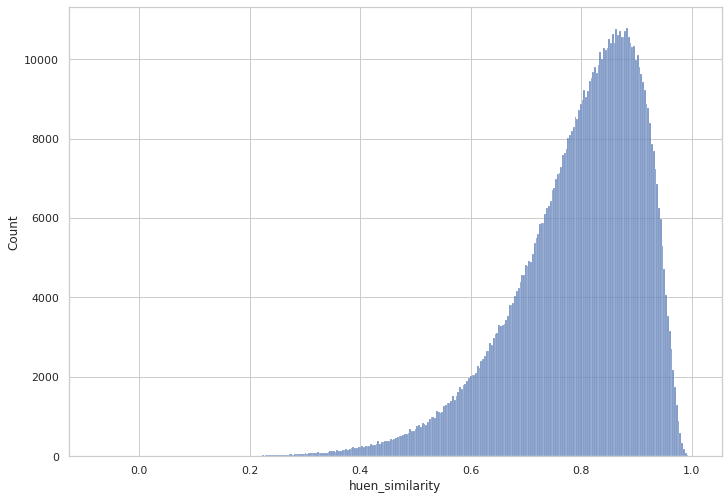

In [5]:
sns.histplot(df['huen_similarity'])

<AxesSubplot:xlabel='enhu_similarity', ylabel='Count'>

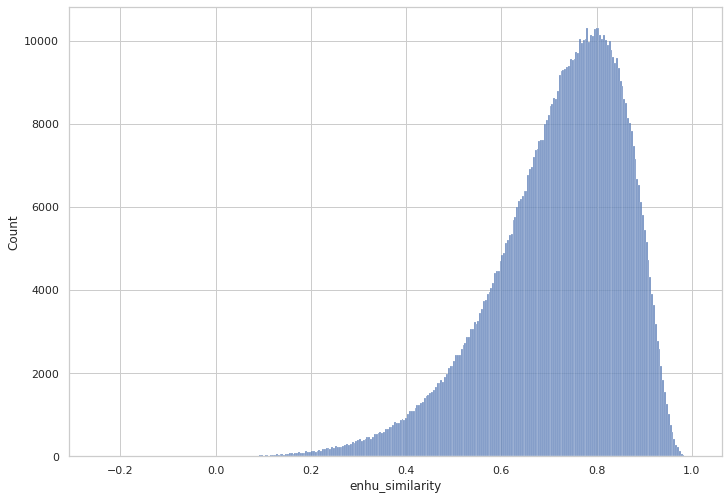

In [6]:
sns.histplot(df['enhu_similarity'])

In [7]:
def get_basic_stats(df, col):
    metric_dict = {}
    metric_dict['q0.001'] = df[col].quantile(q=0.001)
    metric_dict['q0.01'] = df[col].quantile(q=0.01)
    metric_dict['q0.25'] = df[col].quantile(q=0.25)
    metric_dict['q0.5'] = df[col].quantile(q=0.5)
    metric_dict['q0.75'] = df[col].quantile(q=0.75)
    metric_dict['q0.99'] = df[col].quantile(q=0.99)
    metric_dict['q0.999'] = df[col].quantile(q=0.999)
    metric_dict['min'] = df[col].min()
    metric_dict['max'] = df[col].max()
    metric_dict['mean'] = df[col].mean()
    metric_dict['stdev'] = df[col].std()
    
    return metric_dict

In [8]:
huen_similarity_metrics = get_basic_stats(df, 'huen_similarity')
huen_similarity_metrics

{'q0.001': 0.2626877446770668,
 'q0.01': 0.43335984259843824,
 'q0.25': 0.730378270149231,
 'q0.5': 0.8165398836135864,
 'q0.75': 0.8815585672855377,
 'q0.99': 0.9635053312778473,
 'q0.999': 0.9795788632035256,
 'min': -0.07363514602184296,
 'max': 1.0,
 'mean': 0.7939657490495609,
 'stdev': 0.11678799539447605}

In [9]:
enhu_similarity_metrics = get_basic_stats(df, 'enhu_similarity')
enhu_similarity_metrics

{'q0.001': 0.15463465452194214,
 'q0.01': 0.3074034070968628,
 'q0.25': 0.6408174633979797,
 'q0.5': 0.742557168006897,
 'q0.75': 0.8233204632997513,
 'q0.99': 0.9376656275987625,
 'q0.999': 0.9642316173911095,
 'min': -0.24618439376354215,
 'max': 1.0000001192092896,
 'mean': 0.7197353069042347,
 'stdev': 0.13862667650430524}

In [13]:
pd.options.display.max_colwidth = 200

In [14]:
df[
    (df['huen_similarity'] > huen_similarity_metrics['q0.01'])
    & (df['huen_similarity'] < huen_similarity_metrics['q0.25'])
    & (df['enhu_similarity'] > enhu_similarity_metrics['q0.01'])
    & (df['enhu_similarity'] < enhu_similarity_metrics['q0.25'])
]

,hun,eng,hun_translation,eng_translation,huen_similarity,enhu_similarity
24,"Úristen , tagságát művelsz ?","god , man , its membership of the imi joint undertaking you doin ?","Istenem, ember, ez a tagsága annak a cégnek, amelyre vállalkozol?","My God, are you doing membership?",0.686370,0.521931
27,Ned megismételte a fiút .,ned told the boy again .,...megmondta a fiúnak.,Ned repeated the boy.,0.688298,0.540274
28,Mildred megérezte Ezt .,she would feel it upon her .,Érezni fogja...,Mildred felt this.,0.587823,0.431739
37,Philip lefejtette magáról az érzéseket .,he released him from her .,Elengedte a lánytól.,Philip stripped off his feelings.,0.662533,0.424457
41,Zsákos Bilbó a rendszámtáblát utálja !,thats the license plate bilbo baggins hates !,Ez a rendszámtábla bilbo baggins gyűlöli!,Bilbo Baggins hates the plate!,0.634404,0.625492
...,...,...,...,...,...,...
830575,Én mindenből csak magát gyűjtöm .,i collect a firmer grip .,Erősebb fogást gyűjtök...,I collect you from everything.,0.656734,0.426465
830577,sok minden furcsaságot untat az ilyesmi .,that will bore you .,Ez untat.,There is much oddness about such things.,0.616490,0.545495
830603,Dick szemüvegét nem mondhatta el magáról .,dick could not claim his glasses .,A farok nem követelheti a szemüvegét...,He couldnt tell Dicks glasses.,0.703298,0.584707
830605,"+ az építési anyagok tárolása a nevét tovább rontotta ,","the storing of building materials makes little or nothing about her even worse ,","az építőanyagok tárolása nem tesz semmit, vagy még rosszabbat,","storage of construction materials worsened his name,",0.657926,0.595248


In [24]:
df[
    (df['huen_similarity'] > huen_similarity_metrics['q0.01'])
    & (df['huen_similarity'] < huen_similarity_metrics['q0.25'])
    & (df['enhu_similarity'] > enhu_similarity_metrics['q0.01'])
    & (df['enhu_similarity'] < enhu_similarity_metrics['q0.25'])
]

,hun,eng,hun_translation,eng_translation,huen_similarity,enhu_similarity,hu_word_count,en_word_count
24,"Úristen , tagságát művelsz ?","god , man , its membership of the imi joint undertaking you doin ?","Istenem, ember, ez a tagsága annak a cégnek, amelyre vállalkozol?","My God, are you doing membership?",0.686370,0.521931,7.5,10.0
27,Ned megismételte a fiút .,ned told the boy again .,...megmondta a fiúnak.,Ned repeated the boy.,0.688298,0.540274,4.0,5.0
28,Mildred megérezte Ezt .,she would feel it upon her .,Érezni fogja...,Mildred felt this.,0.587823,0.431739,3.0,5.0
37,Philip lefejtette magáról az érzéseket .,he released him from her .,Elengedte a lánytól.,Philip stripped off his feelings.,0.662533,0.424457,4.5,5.5
41,Zsákos Bilbó a rendszámtáblát utálja !,thats the license plate bilbo baggins hates !,Ez a rendszámtábla bilbo baggins gyűlöli!,Bilbo Baggins hates the plate!,0.634404,0.625492,6.0,6.5
...,...,...,...,...,...,...,...,...
830575,Én mindenből csak magát gyűjtöm .,i collect a firmer grip .,Erősebb fogást gyűjtök...,I collect you from everything.,0.656734,0.426465,4.5,5.5
830577,sok minden furcsaságot untat az ilyesmi .,that will bore you .,Ez untat.,There is much oddness about such things.,0.616490,0.545495,4.5,6.0
830603,Dick szemüvegét nem mondhatta el magáról .,dick could not claim his glasses .,A farok nem követelheti a szemüvegét...,He couldnt tell Dicks glasses.,0.703298,0.584707,6.5,6.0
830605,"+ az építési anyagok tárolása a nevét tovább rontotta ,","the storing of building materials makes little or nothing about her even worse ,","az építőanyagok tárolása nem tesz semmit, vagy még rosszabbat,","storage of construction materials worsened his name,",0.657926,0.595248,9.5,10.5


In [25]:
df[
    (df['huen_similarity'] > huen_similarity_metrics['q0.25'])
    & (df['enhu_similarity'] > enhu_similarity_metrics['q0.25'])
]

,hun,eng,hun_translation,eng_translation,huen_similarity,enhu_similarity,hu_word_count,en_word_count
0,A Bizottság ezt az információt az Európai Unió Hivatalos Lapja C sorozatában hirdeti ki .,the commission shall publish this information in the c series of the official journal of the european union .,a bizottság közzéteszi ezt az információt az európeai szakszervezet hivatalos lapjának c sorozatában.,The Commission publishes this information in the C` series of the Official Journal of the European Union.,0.922374,0.777107,14.0,18.0
1,A Bizottság ezeket az információkat közli a tagállamok vámhatóságaival .,the commission shall communicate this information to the customs authorities of the member states .,a bizottság közli ezt az információt a tagállamok vámhatóságaival.,The Commission will communicate this information to the customs authorities of the Member States.,0.953655,0.897023,9.5,14.5
6,( 3 ) A bizottság maga állapítja meg a Kombinált Nómenklatúra értelmezésére irányadó általános szabályokat .,the committee shall adopt the general rules ..,A bizottság elfogadja az általános szabályokat.,3 ) The Committee shall adopt the general rules for the interpretation of the Combined Nomenclature.,0.870230,0.760501,11.0,12.0
8,Csakhogy a naptár pontatlanul jelezte az alkalmazandó minőségértékelési eljárásokat .,but the applicable conformity assessment procedures the air force colonel had consulted related to 1961 .,"de az alkalmazandó megfelelőségértékelési eljárások, amelyeket a légierő-ezredes 1961-ben említett.",But the calendar failed to indicate the applicable quality assessment procedures.,0.860972,0.806832,10.0,13.5
9,( 15 ) Ez a rendelet a 2005/32/EK irányelv 8. cikkével összhangban meghatározza a napnyugta időpontját .,"( 15 ) in accordance with article 8 of directive 2005/32 / ec , this regulation should specify the calendar .",15 ) a 2005/32/ec irányelv 8. cikkével összhangban ez a rendelet meghatározza a naptárt...,( 15 ) This Regulation determines the date of sunset in accordance with Article 8 of Directive 2005/32/EC.,0.903163,0.959037,15.5,19.5
...,...,...,...,...,...,...,...,...
830641,( 9 ) Az igazgatási tevékenységek különböző területein a számítógépes eljárások használata fokozatosan felváltja tőled segítséget .,( 9 ) the use of computerised procedures is gradually replacing little juice in the different areas of administrative activity .,( 9 ) a számítógépes eljárások használata fokozatosan helyettesíti a kis levet az adminisztratív tevékenységek különböző területein.,( 9 ) The use of computer procedures in the various areas of administrative activity gradually replaces your help.,0.958414,0.925954,17.0,20.0
830643,( 3 ) Az előlegelszámoló tisztviselő az alábbiak alapján és a következő határok között jogosult harmadik személy részére valamit végezni :,the imprest administrator may make a question on the basis and within the limits of :,az előlegelszámoló tisztviselő a következők alapján és határain belül tehet kérdést:,3 ) The imprest administrator shall do something on the basis of the following and for the third party entitled to the following limits:,0.928219,0.833042,16.0,20.0
830644,"Tuppence dünnyögött megvető kézmozdulatot , s bement az ebédlőbe .",tuppence murmured his hands and went into the dining room .,"Kezét mormolta, és bement az ebédlőbe.",Tuppence murmured a contemptuous gesture and went into the dining room.,0.899864,0.802763,8.0,11.0
830646,"Megjegyzendő , hogy az említett piaci szegmensek mennyiségi szempontból a közösségi piac ezt teszik ki .",it should be noted that these market segments represent what in volume terms .,"Meg kell jegyezni, hogy ezek a piaci szegmensek valójában mit jelentenek...",It should be noted that these market segments represent this in terms of volume on the Community market.,0.943972,0.799594,13.5,16.0


In [26]:
df[(df['huen_similarity'] > huen_similarity_metrics['q0.01']) & (df['enhu_similarity'] > enhu_similarity_metrics['q0.01'])]

,hun,eng,hun_translation,eng_translation,huen_similarity,enhu_similarity,hu_word_count,en_word_count
0,A Bizottság ezt az információt az Európai Unió Hivatalos Lapja C sorozatában hirdeti ki .,the commission shall publish this information in the c series of the official journal of the european union .,a bizottság közzéteszi ezt az információt az európeai szakszervezet hivatalos lapjának c sorozatában.,The Commission publishes this information in the C` series of the Official Journal of the European Union.,0.922374,0.777107,14.0,18.0
1,A Bizottság ezeket az információkat közli a tagállamok vámhatóságaival .,the commission shall communicate this information to the customs authorities of the member states .,a bizottság közli ezt az információt a tagállamok vámhatóságaival.,The Commission will communicate this information to the customs authorities of the Member States.,0.953655,0.897023,9.5,14.5
2,Valamennyi módosító közlemény tartalmazza az útjait és a 16. mezőt .,all revision messages include the ways iv him .,minden átmeneti üzenet benne van.,Every revision message contains its paths and field 16.,0.734506,0.451700,8.0,9.0
3,"Az ember sohase találja el a 3. , a 7. , a 13. , a 14. .","you can never guess field types 3 , 7 , 13 , 14 and 16 .","A 3., 7., 13., 14. és 16. mezőtípust nem lehet kitalálni.","One never finds it on 3, 7, 13, 14 .",0.804653,0.530200,14.0,13.0
4,Végül a kulcs képe juttatott eszébe az itteni ügyeket .,the sight of the key reminded it .,a kulcs látványa emlékeztette...,"Finally, a picture of the key reminded him of the business here.",0.883965,0.613354,7.0,10.0
...,...,...,...,...,...,...,...,...
830643,( 3 ) Az előlegelszámoló tisztviselő az alábbiak alapján és a következő határok között jogosult harmadik személy részére valamit végezni :,the imprest administrator may make a question on the basis and within the limits of :,az előlegelszámoló tisztviselő a következők alapján és határain belül tehet kérdést:,3 ) The imprest administrator shall do something on the basis of the following and for the third party entitled to the following limits:,0.928219,0.833042,16.0,20.0
830644,"Tuppence dünnyögött megvető kézmozdulatot , s bement az ebédlőbe .",tuppence murmured his hands and went into the dining room .,"Kezét mormolta, és bement az ebédlőbe.",Tuppence murmured a contemptuous gesture and went into the dining room.,0.899864,0.802763,8.0,11.0
830645,U Po Kyin nemtetszése jeléül néhány udvarias szót tett .,u po kyin threw up a few pleasant words in disgust .,u po kyin undorodva feldobott néhány kellemes szót.,U Po Kyin spoke a few polite words in displeasure.,0.783681,0.622425,9.0,11.0
830646,"Megjegyzendő , hogy az említett piaci szegmensek mennyiségi szempontból a közösségi piac ezt teszik ki .",it should be noted that these market segments represent what in volume terms .,"Meg kell jegyezni, hogy ezek a piaci szegmensek valójában mit jelentenek...",It should be noted that these market segments represent this in terms of volume on the Community market.,0.943972,0.799594,13.5,16.0


In [27]:
df['avg_huen_similarity'] = df['huen_similarity'] / df['en_word_count']
df['avg_enhu_similarity'] = df['enhu_similarity'] / df['hu_word_count']

<AxesSubplot:xlabel='avg_huen_similarity', ylabel='Count'>

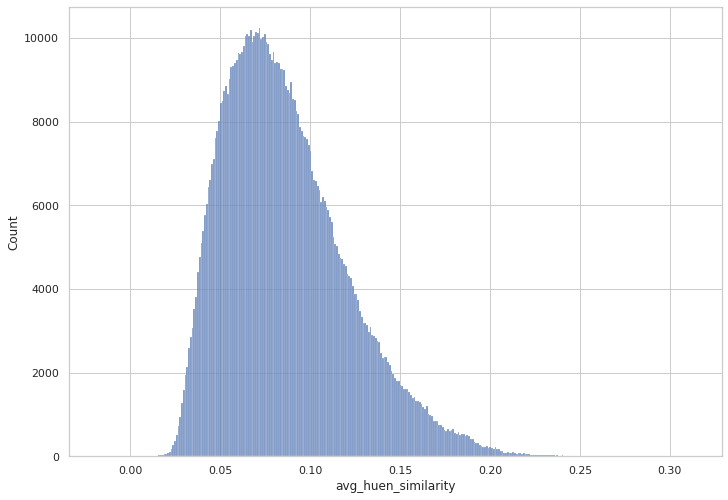

In [31]:
sns.histplot(df['avg_huen_similarity'])

<AxesSubplot:xlabel='avg_enhu_similarity', ylabel='Count'>

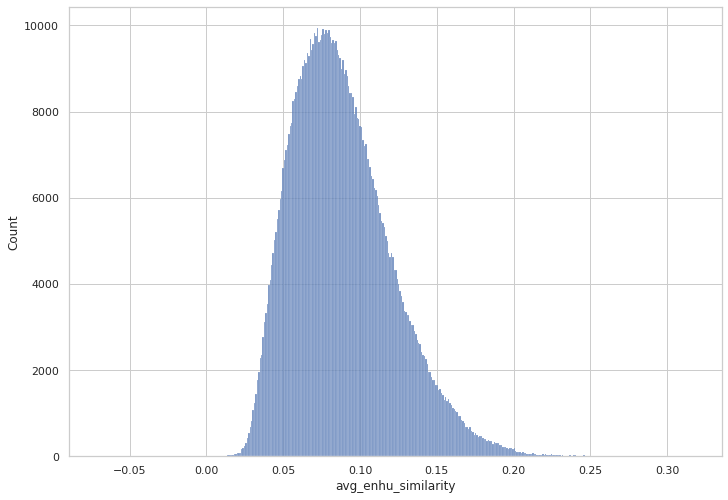

In [29]:
sns.histplot(df['avg_enhu_similarity'])

In [36]:
avg_huen_similarity_metrics = get_basic_stats(df, 'avg_huen_similarity')
avg_huen_similarity_metrics

{'q0.001': 0.02408762652412881,
 'q0.01': 0.031207912213058884,
 'q0.25': 0.0605711693077568,
 'q0.5': 0.0811218281586965,
 'q0.75': 0.10662898123264312,
 'q0.99': 0.18533366307379712,
 'q0.999': 0.2202971870218019,
 'min': -0.01778637742002805,
 'max': 0.31222881873448693,
 'mean': 0.08642062051945869,
 'stdev': 0.03440046152194985}

In [35]:
avg_enhu_similarity_metrics = get_basic_stats(df, 'avg_enhu_similarity')
avg_enhu_similarity_metrics

{'q0.001': 0.023865377693666253,
 'q0.01': 0.03308103836232965,
 'q0.25': 0.06423805589261262,
 'q0.5': 0.08420068025588989,
 'q0.75': 0.10790213672823497,
 'q0.99': 0.18015129660566648,
 'q0.999': 0.21893046600478272,
 'min': -0.0703383982181549,
 'max': 0.3160068194071452,
 'mean': 0.08838038967418456,
 'stdev': 0.03252474023687921}

In [34]:
df[df['avg_enhu_similarity'] > 0.05]

,hun,eng,hun_translation,eng_translation,huen_similarity,enhu_similarity,hu_word_count,en_word_count,avg_huen_similarity,avg_enhu_similarity
0,A Bizottság ezt az információt az Európai Unió Hivatalos Lapja C sorozatában hirdeti ki .,the commission shall publish this information in the c series of the official journal of the european union .,a bizottság közzéteszi ezt az információt az európeai szakszervezet hivatalos lapjának c sorozatában.,The Commission publishes this information in the C` series of the Official Journal of the European Union.,0.922374,0.777107,14.0,18.0,0.051243,0.055508
1,A Bizottság ezeket az információkat közli a tagállamok vámhatóságaival .,the commission shall communicate this information to the customs authorities of the member states .,a bizottság közli ezt az információt a tagállamok vámhatóságaival.,The Commission will communicate this information to the customs authorities of the Member States.,0.953655,0.897023,9.5,14.5,0.065769,0.094424
2,Valamennyi módosító közlemény tartalmazza az útjait és a 16. mezőt .,all revision messages include the ways iv him .,minden átmeneti üzenet benne van.,Every revision message contains its paths and field 16.,0.734506,0.451700,8.0,9.0,0.081612,0.056463
4,Végül a kulcs képe juttatott eszébe az itteni ügyeket .,the sight of the key reminded it .,a kulcs látványa emlékeztette...,"Finally, a picture of the key reminded him of the business here.",0.883965,0.613354,7.0,10.0,0.088397,0.087622
5,"Rendben van , John , mindent majd én intézem .","all right , john , ill handle her at this end .","Rendben van, John, ennek a végén majd elintézem...","All right, John, Ill handle everything.",0.570700,0.658716,9.0,9.0,0.063411,0.073191
...,...,...,...,...,...,...,...,...,...,...
830643,( 3 ) Az előlegelszámoló tisztviselő az alábbiak alapján és a következő határok között jogosult harmadik személy részére valamit végezni :,the imprest administrator may make a question on the basis and within the limits of :,az előlegelszámoló tisztviselő a következők alapján és határain belül tehet kérdést:,3 ) The imprest administrator shall do something on the basis of the following and for the third party entitled to the following limits:,0.928219,0.833042,16.0,20.0,0.046411,0.052065
830644,"Tuppence dünnyögött megvető kézmozdulatot , s bement az ebédlőbe .",tuppence murmured his hands and went into the dining room .,"Kezét mormolta, és bement az ebédlőbe.",Tuppence murmured a contemptuous gesture and went into the dining room.,0.899864,0.802763,8.0,11.0,0.081806,0.100345
830645,U Po Kyin nemtetszése jeléül néhány udvarias szót tett .,u po kyin threw up a few pleasant words in disgust .,u po kyin undorodva feldobott néhány kellemes szót.,U Po Kyin spoke a few polite words in displeasure.,0.783681,0.622425,9.0,11.0,0.071244,0.069158
830646,"Megjegyzendő , hogy az említett piaci szegmensek mennyiségi szempontból a közösségi piac ezt teszik ki .",it should be noted that these market segments represent what in volume terms .,"Meg kell jegyezni, hogy ezek a piaci szegmensek valójában mit jelentenek...",It should be noted that these market segments represent this in terms of volume on the Community market.,0.943972,0.799594,13.5,16.0,0.058998,0.059229
